## PART 2: EXPLORATORY DATA ANALYSIS

In this notebook I intend to **perform an exploratory data analysis**, necessary to obtain valuable insights about credit risk in Lending Club's operations, encompassing the first and second steps of crisp-dm framework. The objective here is to find these insights and investigate the information we have through univariate, bivariate and multivariate analysis of the available features, describing Lending Club's current investment portfolio and deciding preprocessing techniques to be applied (mainly to the PD Model). Finally, the rationale behind each decision is explained in detail below.

#### 2.0 Import the libraries

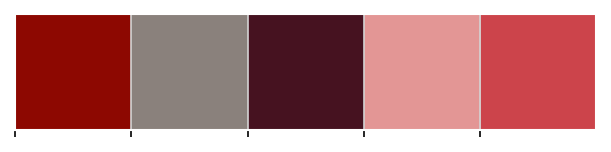

In [66]:
# Data manipulation and visualization.
import pandas as pd
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns

# Utils.
from src.eda_utils import *

# Display options.
pd.set_option('display.max_rows', None)
pd.set_option('display.max_info_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Filter warnings.
import warnings
warnings.filterwarnings('ignore')

# Visualization Settings
mpl.style.use('ggplot')
mpl.rcParams['axes.facecolor']      = 'white'
mpl.rcParams['grid.color']          = 'lightgray'
mpl.rcParams['xtick.color']         = 'black'
mpl.rcParams['ytick.color']         = 'black'
mpl.rcParams['axes.grid']           = True
mpl.rcParams['figure.dpi']          = 150

# Palette Seting
instyle_palette = ['#8d0801', '#8a817c', '#461220', '#e39695', '#cc444b']
sns.set_palette(sns.color_palette(instyle_palette))
sns.palplot(sns.color_palette(instyle_palette))

#### 2.1 Collect the data
- The data contains complete loan data for all loans issued through the 2007-2015, including the current loan status (Current, Late, Fully Paid, etc.) and the latest payment information. 
- It is much more clean after the data cleaning task performed, including most of the relevant variables in its correct data types, some missing and outlier values already treat and reduced memory usage in a parquet file. Moreover, it is already in chronological order of loans. Thus, in this step I will just quickly check general information and remaining missing values for further treatments.
- This include consumer loans, as explained above in Lending Club's services, and encompasses data available at the moment of the application. Thus, it will be used to build an application model.

In [2]:
parquet_file_path = '/Users/pedrohenriquealmeidaoliveira/Documents/data_science/lending_club_credit_scoring/input/clean_loan_data.parquet'
df = pd.read_parquet(parquet_file_path)

In [3]:
df.head()

loan_amnt  funded_amnt  term  int_rate  installment grade sub_grade  emp_length home_ownership  annual_inc verification_status    issue_d                                        loan_status             purpose addr_state        dti  delinq_2yrs  inq_last_6mths  mths_since_last_delinq  open_acc  pub_rec  revol_bal  revol_util  total_acc initial_list_status  out_prncp   total_pymnt  total_rec_prncp  total_rec_int  total_rec_late_fee   recoveries  collection_recovery_fee  last_pymnt_amnt  collections_12_mths_ex_med  acc_now_delinq  tot_coll_amt  tot_cur_bal  total_rev_hi_lim  mths_since_earliest_cr_line  default  recovery_rate  credit_conversion_factor
0      25000        25000    36     11.89   829.099976     B        B4           0           RENT     85000.0            Verified 2009-08-01                                         Fully Paid  debt_consolidation         CA  19.480000            0               0                     NaN        10        0      28854   52.099998         42                   f        0.0  29324.320312     25000.000000    4324.319824            0.000000     0.000000                 0.000000      7392.080078                         0.0               0           NaN          NaN               NaN                          281        1       0.000000                  0.000000
1       1000         1000    36     16.08    35.200001     F        F2           0           RENT     30000.0        Not Verified 2008-07-01  Does not meet the credit policy. Status:Fully ...  debt_consolidation         IL  23.840000            0               1                     NaN         9        0      10125   90.400002         15                   f        0.0   1207.760010       999.989990     207.770004            0.000000     0.000000                 0.000000       538.969971                         0.0               0           NaN          NaN               NaN                          192        1       0.000000                  0.000010
2       7000         7000    36     10.71   228.220001     B        B5           0           RENT     65000.0        Not Verified 2008-05-01                                         Fully Paid         credit_card         NY  14.290000            0               0                     NaN         7        0      33623   76.699997          7                   f        0.0   8215.450195      7000.000000    1215.449951            0.000000     0.000000                 0.000000       228.479996                         0.0               0           NaN          NaN               NaN                          202        1       0.000000                  0.000000
3       7000         7000    36     16.08   246.380005     F        F2          10       MORTGAGE    189500.0            Verified 2008-04-01  Does not meet the credit policy. Status:Charge...  debt_consolidation         CA  22.469999            0               4                     0.0        16        0     150971   92.300003         31                   f        0.0   1231.900024       783.460022     448.190002            0.000000     0.250000                 0.045000       246.380005                         0.0               0           NaN          NaN               NaN                          347        0       0.000036                  0.888077
4      25000        25000    36     16.99   891.200012     D        D3           1           RENT     70000.0            Verified 2014-08-01                                        Charged Off  debt_consolidation         NY  10.500000            0               0                    41.0        10        0      19878   66.300003         17                   f        0.0   6073.100098      1634.650024    1038.949951           44.560001  3354.939941               603.889221       935.760010                         0.0               0           0.0      34561.0           30000.0                          206        0       0.134198                  0.934614

In [4]:
df.tail()

loan_amnt  funded_amnt  term  int_rate  installment grade sub_grade  emp_length home_ownership  annual_inc verification_status    issue_d loan_status             purpose addr_state        dti  delinq_2yrs  inq_last_6mths  mths_since_last_delinq  open_acc  pub_rec  revol_bal  revol_util  total_acc initial_list_status     out_prncp   total_pymnt  total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  last_pymnt_amnt  collections_12_mths_ex_med  acc_now_delinq  tot_coll_amt  tot_cur_bal  total_rev_hi_lim  mths_since_earliest_cr_line  default  recovery_rate  credit_conversion_factor
466280       4000         4000    36      8.19   125.699997     A        A5           0       MORTGAGE     24000.0        Not Verified 2014-12-01     Current    home_improvement         SD  10.000000            0               0                     NaN         9        3       7245   32.099998         13                   f   2773.850098   1505.670044      1226.150024     279.519989                 0.0         0.0                      0.0       125.699997                         0.0               0         652.0      62585.0           22600.0                          331        1            0.0                  0.693462
466281      12000        12000    36     11.44   395.369995     B        B4           3           RENT     68000.0        Not Verified 2014-12-01  Fully Paid  debt_consolidation         OR  12.970000            1               0                     9.0         6        0       6989   42.400002         21                   f      0.000000  13100.910156     12000.000000    1100.910034                 0.0         0.0                      0.0      9158.650391                         0.0               0        2867.0       6989.0           17400.0                          221        1            0.0                  0.000000
466282       2000         2000    36     15.99    70.309998     D        D2           7           RENT     37000.0        Not Verified 2014-12-01     Current               other         AZ  16.190001            2               1                     5.0         9        0       4533   20.100000         22                   f   1435.930054    839.280029       564.070007     275.209991                 0.0         0.0                      0.0        70.309998                         0.0               0           0.0      19342.0           22500.0                          283        1            0.0                  0.717965
466283      16000        16000    60     11.44   351.399994     B        B4           6            OWN    109777.0            Verified 2014-12-01     Current  debt_consolidation         VA  11.630000            1               0                    12.0         7        0       7253   60.400002         14                   w  13484.410156   4191.379883      2515.590088    1675.790039                 0.0         0.0                      0.0       351.399994                         0.0               0           0.0     373743.0           12000.0                          166        1            0.0                  0.842776
466284      15000        15000    60     12.39   336.640015     C        C1          10           RENT     78000.0     Source Verified 2014-12-01     Current  debt_consolidation         VA  12.030000            0               0                     NaN         6        0     138008   29.000000         17                   w  12690.599609   4028.000000      2309.399902    1718.599976                 0.0         0.0                      0.0       336.640015                         0.0               0           0.0     149140.0          184500.0                          275        1            0.0                  0.846040

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 466256 entries, 0 to 466284
Data columns (total 42 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   loan_amnt                    int32         
 1   funded_amnt                  int32         
 2   term                         int8          
 3   int_rate                     float32       
 4   installment                  float32       
 5   grade                        category      
 6   sub_grade                    category      
 7   emp_length                   int16         
 8   home_ownership               category      
 9   annual_inc                   float32       
 10  verification_status          category      
 11  issue_d                      datetime64[ns]
 12  loan_status                  category      
 13  purpose                      category      
 14  addr_state                   category      
 15  dti                          float32       
 16  delinq_

- It is possible to see that the variables are in the correct data types, with optimized memory usage.

In [6]:
missing_df = df.isna().sum().to_frame().rename(columns={0: 'count'}).sort_values(by=['count'], ascending=False)
missing_df['pct'] = round(missing_df['count'] / df.shape[0] * 100, 3)
missing_df.head(10)

count     pct
mths_since_last_delinq      250322  53.688
total_rev_hi_lim             70247  15.066
tot_cur_bal                  70247  15.066
tot_coll_amt                 70247  15.066
revol_util                     311   0.067
collections_12_mths_ex_med     116   0.025
loan_amnt                        0   0.000
total_rec_late_fee               0   0.000
initial_list_status              0   0.000
out_prncp                        0   0.000

- It is possible to see that there are some missings that will require further treatment in data preprocessing step, including imputations with mean/median and so on.

#### 2.2 Split the data
- In the context of credit it's important to use an **out-of-time split** instead of an out-of-sample split because we want to understand how well the model, trained with past data, can predict the default of credit applicants in a future time. 
- The data was already sorted in data cleaning task, providing a chronological order for the loans. Thus, we only need to separate the first **80%** of the data for **training** and the remaining **20%** of the data for **testing**.
- I'll split the data first because the **test set** should contain data that the model hasn't encountered before, mimicking a **real-world production scenario.** So, I'll **set it aside now** and only use it for the final evaluation of the model later on.
- Furthermore, my plan is to examine the data for making **decisions** about **preprocessing**, such as determining which categories should be grouped together and how to create dummy variables. It's crucial to conduct this analysis solely on the **training data** to **prevent issues** like data leakage and overfitting, ensuring a reliable final performance estimate.

In [7]:
# Out-of-time split. 80% training, 20% testing.
train, test = np.split(df, [int(.80 * len(df))])
train['set'] = 'train'
test['set'] = 'test'

In [8]:
# Observe train and test default rates.
print(f"Train default rate: {train['default'].value_counts(normalize=True)}.")
print()
print(f"Test default rate: {test['default'].value_counts(normalize=True)}.")

Train default rate: default
1    0.880151
0    0.119849
Name: proportion, dtype: float64.

Test default rate: default
1    0.932859
0    0.067141
Name: proportion, dtype: float64.


- It is possible to see that test data applicants present a lower default rate.

In [9]:
# Assess train and test sets dimensions.
print(f'Train set has {train.shape[0]} rows and {train.shape[1]} columns.')
print(f'Test set has {test.shape[0]} rows and {test.shape[1]} columns.')

Train set has 373004 rows and 43 columns.
Test set has 93252 rows and 43 columns.


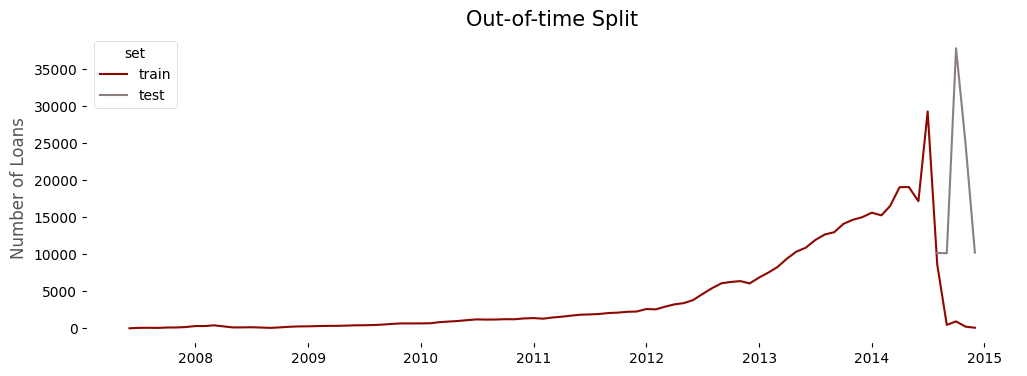

In [10]:
# Plot the out-of-time split.
train_test = pd.concat([train, test])
train_test = train_test.groupby(['issue_d', 'set'])['default'].count().reset_index().rename(columns={'default': 'loans'})

fig, ax = plt.subplots(figsize=(12, 4))
plt.title('Out-of-time Split', fontsize=15)
sns.lineplot(train_test, x='issue_d', y='loans', hue='set', ax=ax)
plt.xlabel('')
plt.ylabel('Number of Loans')
plt.grid(False)
plt.show()

- The out-of-time split was successfully made.
- It is possible to see an increasing trend for the number of loans over time.

#### 2.3 Descriptive Statistics
- I will assess **descriptive statistics** of the numerical variables in order to obtain an initial broad view of the features **distributions**, possible **inconsistent values and outliers.**

In [11]:
train.describe().T

count                           mean                  min                  25%                  50%                  75%                  max            std
loan_amnt                    373004.0                    14187.79363                500.0               8000.0              12000.0              20000.0              35000.0    8225.843831
funded_amnt                  373004.0                   14155.951612                500.0               8000.0              12000.0              20000.0              35000.0    8210.035411
term                         373004.0                      42.355878                 36.0                 36.0                 36.0                 60.0                 60.0      10.589815
int_rate                     373004.0                        13.9716                 5.42                10.99                13.98            16.780001            26.059999       4.340558
installment                  373004.0                     431.151672                15.67           255.330002           380.559998           565.219971           1409.98999     243.258698
emp_length                   373004.0                       5.716738                  0.0                  2.0                  6.0                 10.0                 10.0       3.736419
annual_inc                   373004.0                     72970.6875               1896.0              45000.0              62435.0              88000.0            7446395.0   54015.792969
issue_d                        373004  2013-05-13 17:31:12.250163200  2007-06-01 00:00:00  2012-12-01 00:00:00  2013-09-01 00:00:00  2014-04-01 00:00:00  2014-12-01 00:00:00            NaN
dti                          373004.0                      16.823301                  0.0                11.14            16.559999                22.32            39.950001        7.60946
delinq_2yrs                  373004.0                       0.269453                  0.0                  0.0                  0.0                  0.0                 29.0       0.766153
inq_last_6mths               373004.0                       0.853149                  0.0                  0.0                  0.0                  1.0                 33.0       1.129467
mths_since_last_delinq       167864.0                      34.273674                  0.0                 16.0                 31.0                 50.0                188.0      21.799587
open_acc                     373004.0                      11.029799                  0.0                  8.0                 10.0                 14.0                 76.0       4.849608
pub_rec                      373004.0                       0.146578                  0.0                  0.0                  0.0                  0.0                 63.0       0.488131
revol_bal                    373004.0                   15907.546305                  0.0               6418.0              11731.0              20109.0            2568995.0   19532.250563
revol_util                   372747.0                      56.362419                  0.0            39.599998                 58.0                 75.0           892.299988      23.791231
total_acc                    373004.0                      24.828702                  1.0                 16.0                 23.0                 32.0                118.0      11.427309
out_prncp                    373004.0                    3401.784424                  0.0                  0.0                  0.0          4951.899902         31681.539062    5602.851074
total_pymnt                  373004.0                   12482.793945                  0.0          6283.367554          10551.14502         16578.676758         57777.578125    8471.652344
total_rec_prncp              373004.0                    9625.954102                  0.0          4380.477661               7800.0          12874.36499          35000.03125    7142.605469
total_rec_int                373004.0                    2756.8

Insights:
- The average funded amount of the loans is approximately 14,155 dollars. However, this value can vary significantly, with a standard deviation of 8,210. The minimum funded amount is 500 dollars, and the maximum is 35,000 dollars. Examining the Interquartile Range (IQR), we find that half of the loans fall between 8,000 dollars and 20,000 dollars. This provides an interesting insight into Lending Club's credit approval approach. They seem to be cautious, not providing funding for extremely high amounts on their loans.
- The average interest rate is about 14%. Looking at the middle range, half of the loans had interest rates between 11% and 16.8%, according to the Interquartile Range (IQR). Additionally, the interest rates range from a minimum of 5.42% to a maximum of 26%. This provides an insightful perspective on Lending Club's credit approval process. It seems they generally apply fair and reasonable interest rates to their loans.
- 75% of the borrowers have been employed for at least 2 years. This suggests that having a steady job is important for Lending Club to approve a loan.
- The average annual income is 72,970 dollars, but this value can vary significantly, with a standard deviation of 54,015. Looking at the minimum (1,896 dollars) and maximum (7,446,395 dollars) values, and noticing that the mean is greater than the median, there might be outliers with higher incomes contributing to a right-skewed distribution.
- The average debt-to-income ratio is approximately 16.82%. Examining the percentiles, half of the customers have a DTI of up to 16.6%. This indicates that customers generally approach their debts cautiously, which might contribute to the reasonable default rate of 12%.
- The average credit utilization rate is 56%. Additionally, looking at the percentiles, more than half of the borrowers have a credit utilization of over 50% of their limits. This can be considered a high rate.
- Most of the values of the variables indicating delinquencies and inquiries are zero. This is expected, since 88% of the customers are good borrowers. Although they present this imbalancement, they might be useful and indicative of default/non-default. This will be investigated further.
- The average outstanding principal is 3,401 dollars, with a standard deviation of 5,600. This is acceptable since many borrowers must pay their debts soon, not becoming defaulters.
- Examining recoveries at this point doesn't provide much information. Most values are zero because the majority of customers are good borrowers. Consequently, the average recovery is 99 dollars. It could be insightful to examine the distribution of this variable specifically for defaulters.
- The total revolving high/credit limit appears to have one or more inconsistent outlier values, especially considering the maximum credit limit of 9,999,999 dollars. Further investigation is necessary to address this issue.

#### 2.4 Numerical and categorical variables
- I will evaluate which variables in the data are **numerical and categorical**. This will help plan distinct visualization and exploration strategies for each group. Additionally, it's crucial to examine the **cardinalities** of categorical features, as this will impact preprocessing techniques and the modeling step.

In [12]:
# Assess which are the numerical and categorical features.
numerical_features = train.select_dtypes('number').columns.tolist()
numerical_features.remove('default')
categorical_features = train.select_dtypes('category').columns.tolist()
categorical_features.remove('loan_status')
target = 'default'
print(f'There are {len(numerical_features)} numerical variables in the data. They are: {numerical_features}.')
print(f'There are {len(categorical_features)} categorical variables in the data. They are: {categorical_features}.')

There are 32 numerical variables in the data. They are: ['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'total_pymnt', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'mths_since_earliest_cr_line', 'recovery_rate', 'credit_conversion_factor'].
There are 7 categorical variables in the data. They are: ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'purpose', 'addr_state', 'initial_list_status'].


In [13]:
# Assess categorical features cardinality.
for feature in categorical_features:
    print(f'{feature} - cardinality = {df[feature].nunique()}')
    print()
    print(df[feature].unique())
    print('-' * 150)

grade - cardinality = 7

['B', 'F', 'D', 'C', 'A', 'E', 'G']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']
------------------------------------------------------------------------------------------------------------------------------------------------------
sub_grade - cardinality = 35

['B4', 'F2', 'B5', 'D3', 'C2', ..., 'G4', 'E1', 'G3', 'G5', 'G1']
Length: 35
Categories (35, object): ['A1', 'A2', 'A3', 'A4', ..., 'G2', 'G3', 'G4', 'G5']
------------------------------------------------------------------------------------------------------------------------------------------------------
home_ownership - cardinality = 6

['RENT', 'MORTGAGE', 'OWN', 'NONE', 'OTHER', 'ANY']
Categories (6, object): ['ANY', 'MORTGAGE', 'NONE', 'OTHER', 'OWN', 'RENT']
------------------------------------------------------------------------------------------------------------------------------------------------------
verification_status - cardinality = 3

['Verified', 'Not Verified', 'Source Ve

- Home ownership has categories like 'none', 'other' and 'any' that don't contain useful information. I will decide what to do with them based on how they discriminate between good and bad borrowers further. For the other variables, I will do the same. Moreover, sub grade and address state have the highest cardinality, 35 and 50, respectively.

#### 2.5 Exploratory data analysis
- In this step, I intend to explore the data to find valuable insights about credit risk in Lending Club's credit granting and decide how the preprocessing will be made. Thus, I will do univariate, bivariate and multivariate analysis below.

#### 2.6 Univariate analysis
- In this analysis, I intend to observe the **variables distributions**, searching for **typical values, asymmetries, outliers**, etc.

#### 2.6.1 What is the default rate in Lending Club's loans?

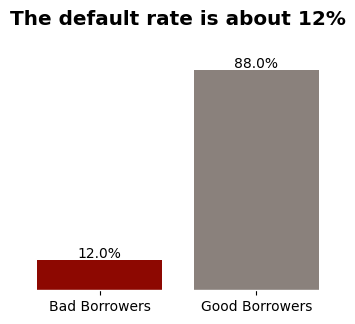

In [14]:
fig, ax = plt.subplots(figsize=(4, 3))

default_grouped = train.groupby(['default'])[['default']].count().rename(columns={'default': 'count'}).reset_index()
default_grouped['pct'] = default_grouped['count'] / default_grouped['count'].sum() * 100

bars = ax.bar(x=default_grouped['default'], height=default_grouped['pct'], color=instyle_palette, width=0.8)
for bar, pct in zip(bars, default_grouped['pct']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{pct:.1f}%', ha='center', va='bottom')
ax.set_title('The default rate is about 12%', pad=25, fontweight='bold')
ax.set_xticks(ticks=default_grouped['default'], labels=['Bad Borrowers', 'Good Borrowers'])
ax.yaxis.set_visible(False)
ax.grid(False)

- The default rate is about 12%. This motivates our project, there is indeed space for improvement in Lending Club's credit granting.
- We are dealing with an imbalanced classification problem.

#### 2.6.2 How are the numerical features distributed?

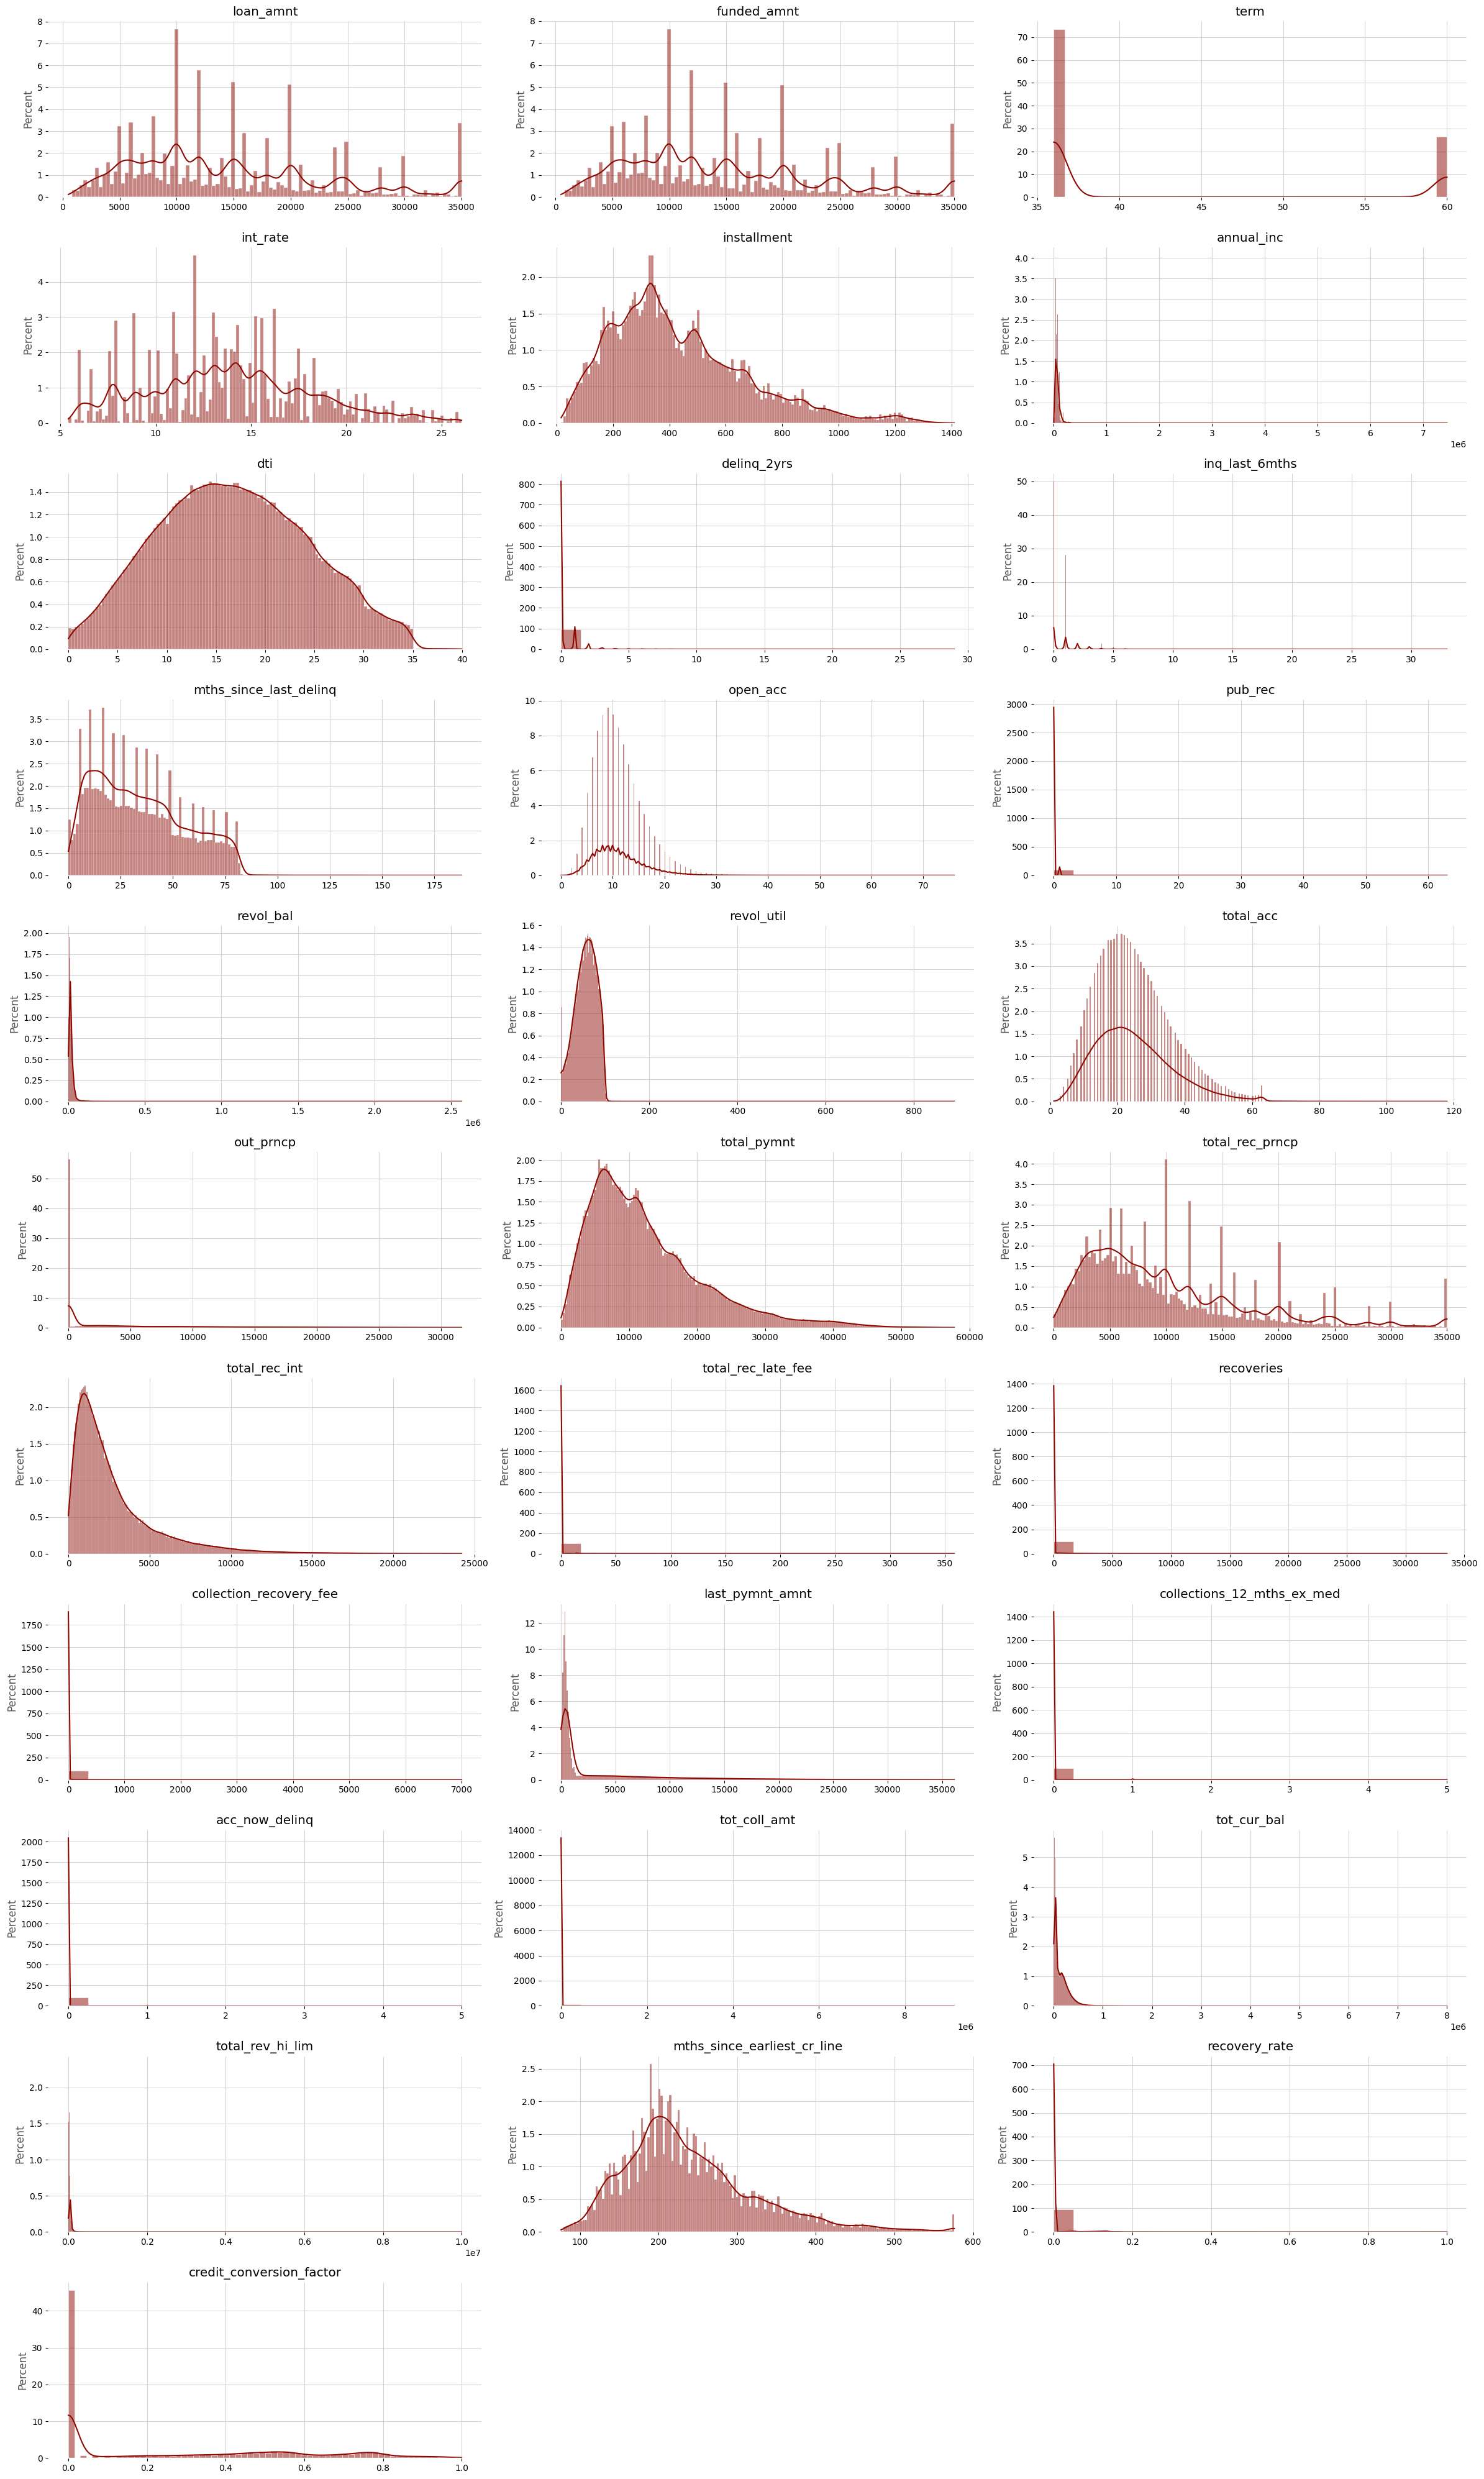

In [15]:
# Separate numerical features that can be better visualized in a countplot from numerical features to be visualized in a histogram.
histogram_features = [x for x in numerical_features if x not in set(['emp_length'])]

# Plot numerical features distributions.
univariate_analysis_plots(train, histogram_features, kde=True, figsize=(24, 40))

Insights:
- Annual income presents a strongly right skewed distribution. Most of the applicants' incomes are concentrated in lower values, while there are some outliers with extremely high incomes. I will investigate this outliers in the next topic.
- The way people's debts compare to their incomes follows a pattern similar to a normal curve. The majority of customers have a debt-to-income ratio of about 16. Some have lower ratios, almost zero, meaning they owe very little relative to their income. Others have higher ratios, close to 40, indicating they owe a significant amount compared to what they earn.
- Many variables show a very skewed distribution to the right because a large number of values are zero (sometimes more than 75%, according to percentiles). Some outliers in these variables have exceptionally high values. This is the case for delinq_2yrs, inq_last_6_mths, pub_rec, out_prncp, total_rec_late_fee, recoveries, collection_recovery_fee, collections_12_mths_ex_med, acc_now_delinq, and tot_coll_am. This is understandable since most customers are good borrowers, but a small portion may have late payments, outstanding debts, or other issues. These variables might not be helpful for prediction (some may not be available at the time of prediction and should be removed to prevent data leakage). However, during the bivariate analysis, I'll explore how well they distinguish between good and bad borrowers. Based on that, I'll decide whether to keep or remove them.
- The distribution of open accounts has a shape resembling a normal curve on the left side. Typically, most customers have around 11 open accounts. However, if we look at the right side, there are outliers – borrowers with an unusually high number of open accounts, such as 70.
- The distribution of revolving balance and credit limit is heavily skewed to the right. Both variables have a minimum value of zero, and most borrowers have balances and credit limits concentrated around lower values. However, there are some extremely high outlier values, such as a 9,999,999 dollars credit limit. In the next section, I will investigate these values further. Such high credit limits are questionable and may indicate inconsistent information, possibly due to errors like human mistakes.
- The majority of borrowers have been maintaining credit lines for approximately 20 years (and there are outliers in higher values), suggesting that Lending Club tends to attract and serve a more mature and experienced group of applicants. This observation aligns with the employee length data, indicating a profile of applicants who have been in the workforce for a substantial period.
- A concerning observation is that over half of the customers have a credit utilization rate of 50% or higher.
- Almost three out of four loans, which is about 73.5%, last for a period of 36 months.

#### 2.6.3 Are there inconsistent outliers in the numerical features?

In [16]:
outlier_indexes, outlier_counts, total_outliers = check_outliers(data=train, features=histogram_features)

There are 485889 outliers in the dataset.

Number (percentage) of outliers per feature: 

loan_amnt: 0 (0.0)%
funded_amnt: 0 (0.0)%
term: 0 (0.0)%
int_rate: 2081 (0.56)%
installment: 9207 (2.47)%
annual_inc: 15814 (4.24)%
dti: 24 (0.01)%
delinq_2yrs: 64005 (17.16)%
inq_last_6mths: 32692 (8.76)%
mths_since_last_delinq: 66 (0.02)%
open_acc: 7088 (1.9)%
pub_rec: 45658 (12.24)%
revol_bal: 17213 (4.61)%
revol_util: 10 (0.0)%
total_acc: 4933 (1.32)%
out_prncp: 33778 (9.06)%
total_pymnt: 13301 (3.57)%
total_rec_prncp: 13965 (3.74)%
total_rec_int: 25279 (6.78)%
total_rec_late_fee: 9389 (2.52)%
recoveries: 23246 (6.23)%
collection_recovery_fee: 22086 (5.92)%
last_pymnt_amnt: 46358 (12.43)%
collections_12_mths_ex_med: 2454 (0.66)%
acc_now_delinq: 1185 (0.32)%
tot_coll_amt: 35536 (9.53)%
tot_cur_bal: 9083 (2.44)%
total_rev_hi_lim: 15965 (4.28)%
mths_since_earliest_cr_line: 12227 (3.28)%
recovery_rate: 23246 (6.23)%
credit_conversion_factor: 0 (0.0)%


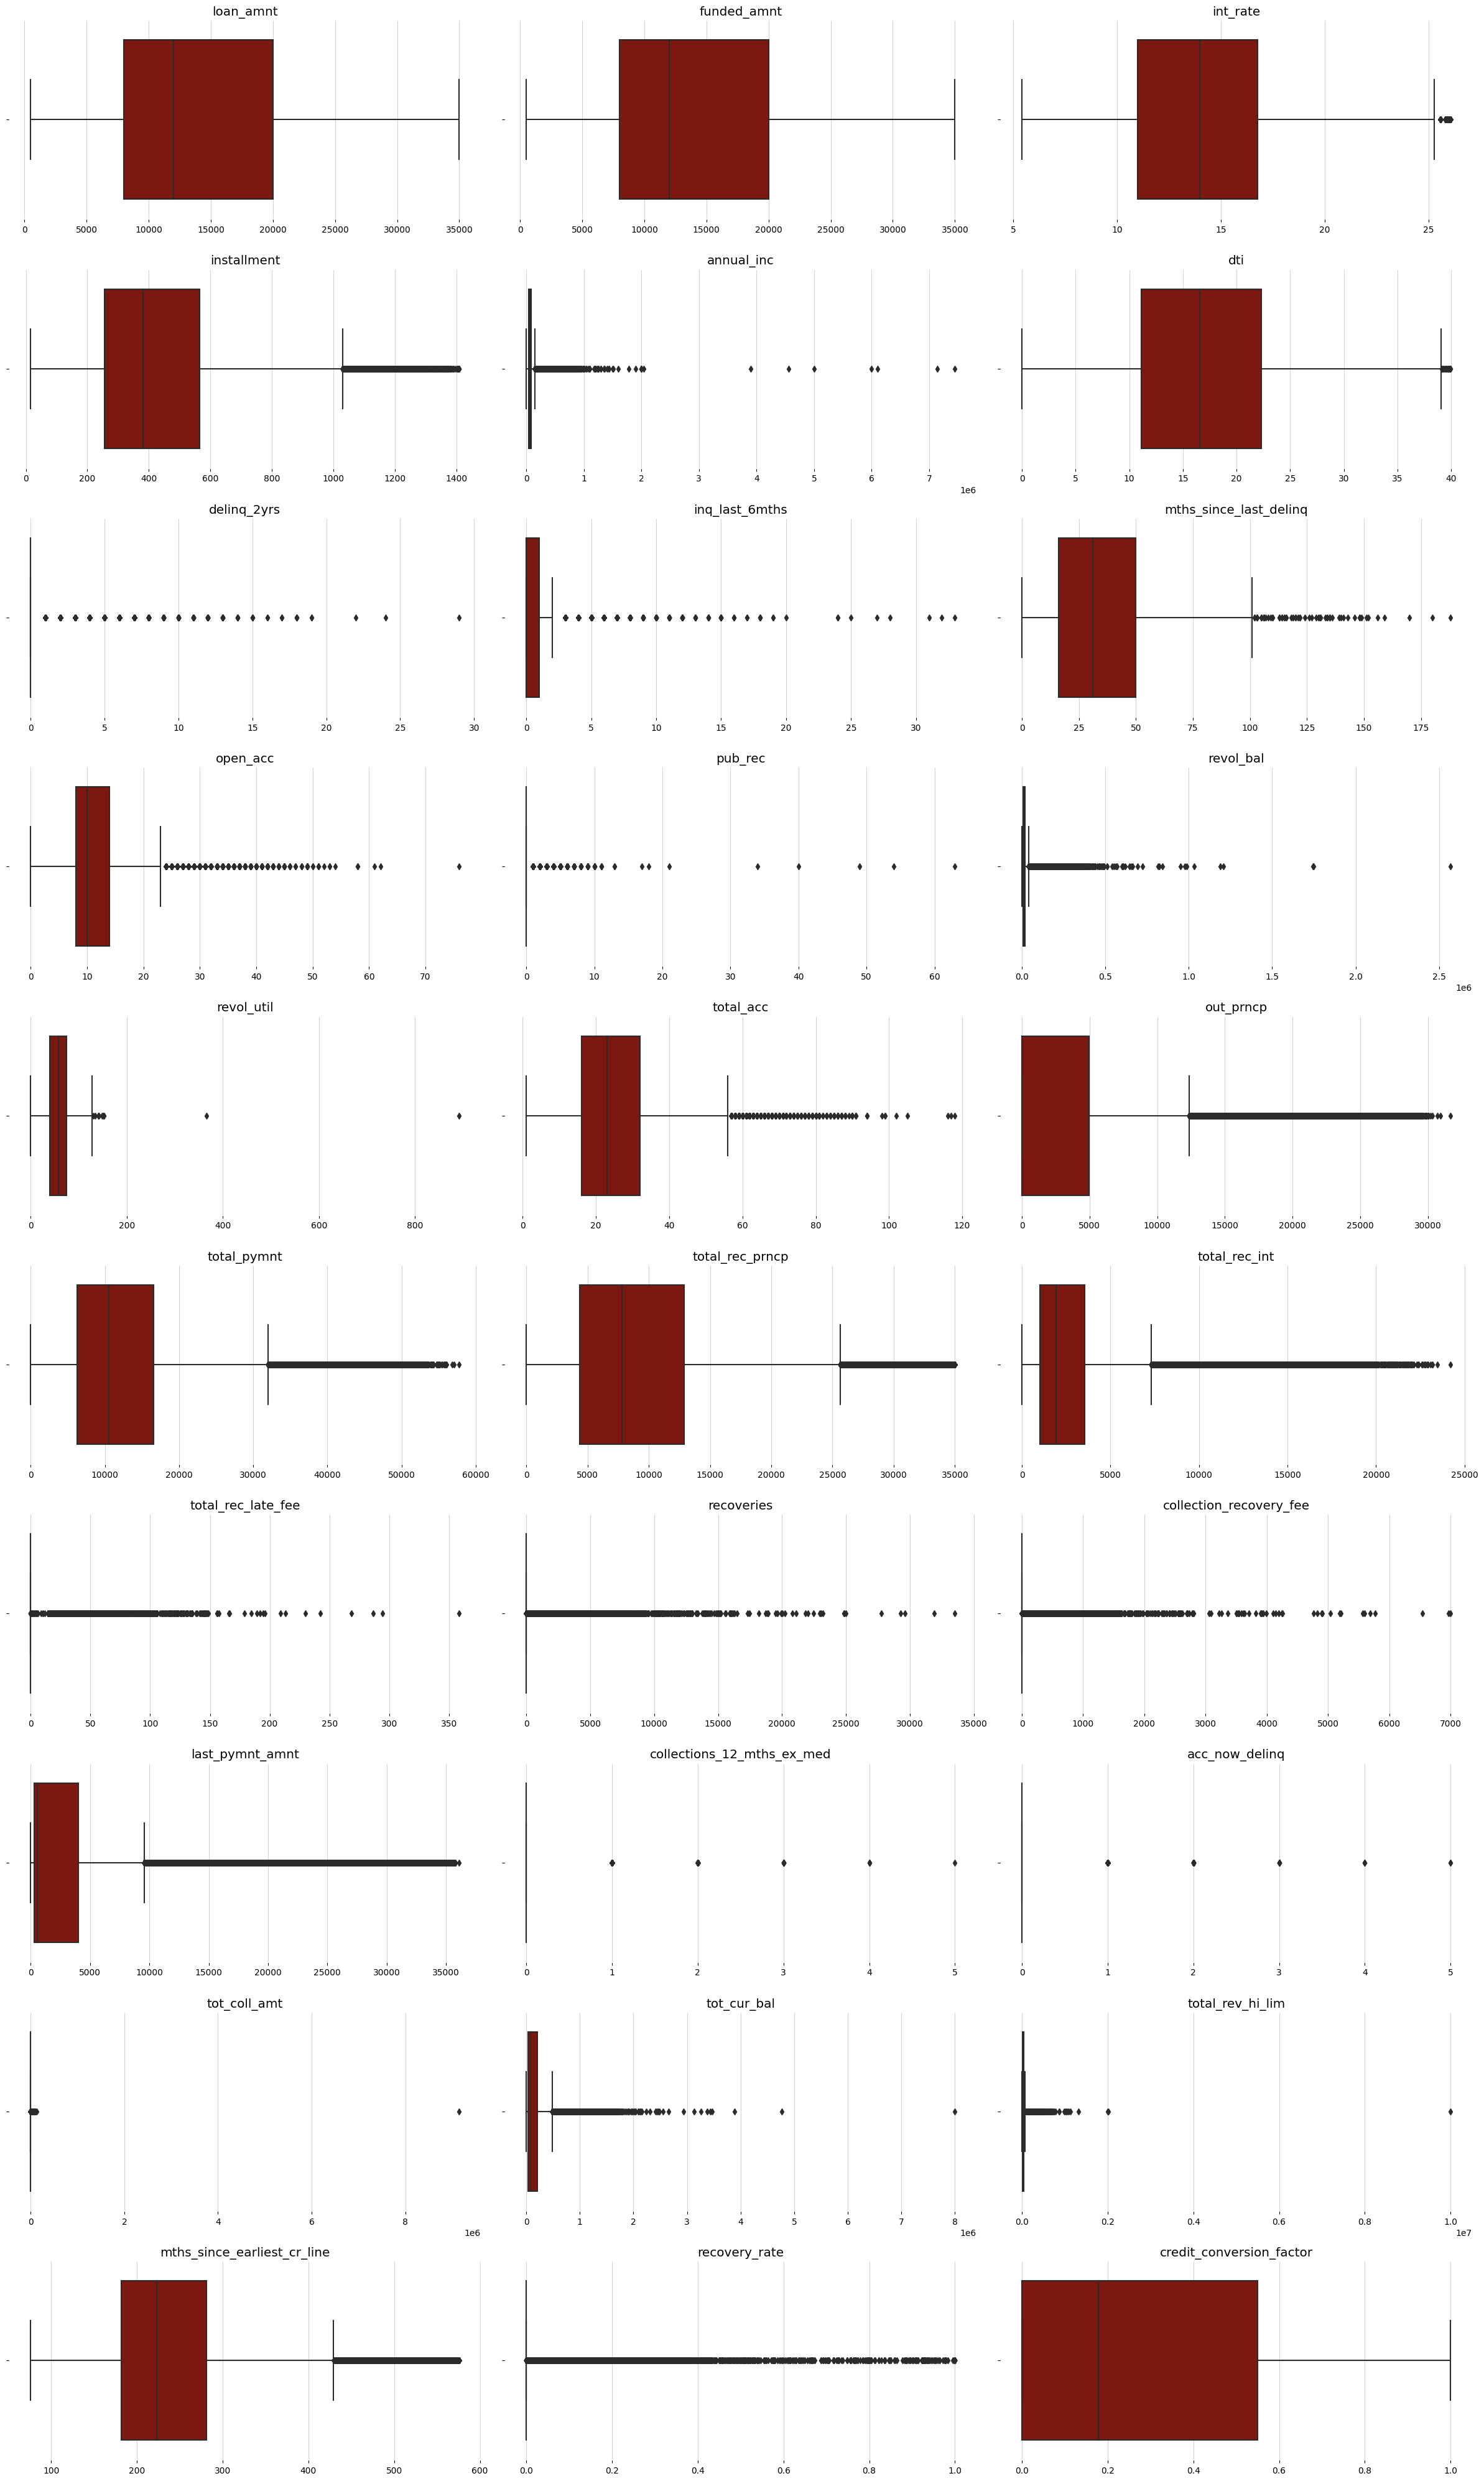

In [17]:
outliers_features = [x for x in numerical_features if x not in set(['term', 'emp_length'])]
univariate_analysis_plots(data=train, features=outliers_features, outliers=True, figsize=(24, 40))

In [18]:
# Investigate outliers in annual income.
train.loc[train['annual_inc'] > 3e6]

loan_amnt  funded_amnt  term  int_rate  installment grade sub_grade  emp_length home_ownership  annual_inc verification_status    issue_d loan_status             purpose addr_state   dti  delinq_2yrs  inq_last_6mths  mths_since_last_delinq  open_acc  pub_rec  revol_bal  revol_util  total_acc initial_list_status     out_prncp   total_pymnt  total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  last_pymnt_amnt  collections_12_mths_ex_med  acc_now_delinq  tot_coll_amt  tot_cur_bal  total_rev_hi_lim  mths_since_earliest_cr_line  default  recovery_rate  credit_conversion_factor    set
11855        5000         5000    36     12.73   167.839996     C        C1          10       MORTGAGE   6000000.0     Source Verified 2010-05-01  Fully Paid    home_improvement         CA  0.01            0               1                    80.0         2        0       1434   37.700001         10                   f      0.000000   5511.859863      5000.000000     511.859985                 0.0         0.0                      0.0      3845.250000                         0.0               0           NaN          NaN               NaN                          199        1            0.0                  0.000000  train
12351       25000        15500    60     10.62   334.079987     B        B3           3       MORTGAGE   3900000.0        Not Verified 2010-06-01  Fully Paid    home_improvement         NM  0.20            0               3                     NaN        12        0       3270   10.200000         32                   f      0.000000  20037.019531     15500.000000    4537.020020                 0.0         0.0                      0.0       353.140015                         0.0               0           NaN          NaN               NaN                          215        1            0.0                  0.000000  train
95050       35000        35000    36     15.31  1218.609985     C        C2          10       MORTGAGE   5000000.0            Verified 2012-12-01  Fully Paid         credit_card         NY  2.36            1               2                    12.0        13        0     975800    0.000000         36                   w      0.000000  43114.628906     35000.000000    8114.629883                 0.0         0.0                      0.0        58.029999                         0.0               0           0.0    8000078.0          988000.0                          279        1            0.0                  0.000000  train
97298       14825        14825    36     13.11   500.299988     B        B4          10       MORTGAGE   7141778.0     Source Verified 2012-12-01  Fully Paid  debt_consolidation         GA  0.25            0               2                    26.0        17        0      11351   70.900002         31                   w      0.000000  17229.330078     14825.000000    2404.330078                 0.0         0.0                      0.0      8223.929688                         0.0               0           0.0      69548.0           16000.0                          256        1            0.0                  0.000000  train
106294      30000        30000    36     12.12   998.150024     B        B3          10       MORTGAGE   6100000.0            Verified 2013-02-01  Fully Paid  debt_consolidation         MD  0.22            0               0                     NaN         8        0      15219   94.500000         19                   w      0.000000  34146.179688     30000.000000    4146.180176                 0.0         0.0                      0.0     18175.779297                         0.0               0           0.0     329254.0           16100.0                          164        1            0.0                  0.000000  train
248207      20000        20000    36      7.62   623.229980     A        A3           5           RENT   7446395.0     Source Verified 2014-02-01     Current  debt_consolidation         NY  0.13            0               0     

In [19]:
# Investigate outliers in total_rev_hi_lim 
train.loc[train['total_rev_hi_lim'] > 2e6]

loan_amnt  funded_amnt  term  int_rate  installment grade sub_grade  emp_length home_ownership  annual_inc verification_status    issue_d loan_status             purpose addr_state    dti  delinq_2yrs  inq_last_6mths  mths_since_last_delinq  open_acc  pub_rec  revol_bal  revol_util  total_acc initial_list_status    out_prncp   total_pymnt  total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  last_pymnt_amnt  collections_12_mths_ex_med  acc_now_delinq  tot_coll_amt  tot_cur_bal  total_rev_hi_lim  mths_since_earliest_cr_line  default  recovery_rate  credit_conversion_factor    set
96097       35000        35000    36     11.14  1148.180054     B        B2          10       MORTGAGE    400000.0            Verified 2013-01-01  Fully Paid  debt_consolidation         FL  33.48            0               4                     NaN        28        0    1743266        29.5         59                   f     0.000000  35951.800781     35000.000000     951.799988                 0.0         0.0                      0.0     33656.699219                         0.0               0           0.0    3471522.0         2013133.0                          394        1            0.0                  0.000000  train
144326      28000        28000    36      8.90   889.090027     A        A5           1       MORTGAGE   1000000.0            Verified 2013-06-01     Current         credit_card         CT  12.54            0               2                    39.0        13        0    2568995        20.4         28                   f  4351.810059  27557.230469     23648.189453    3909.040039                 0.0         0.0                      0.0       889.090027                         0.0               0           0.0    3881449.0         9999999.0                          371        1            0.0                  0.155422  train

In [20]:
# Investigate outliers in revol_bal.
train.loc[train['revol_bal'] > 1.5e6]

loan_amnt  funded_amnt  term  int_rate  installment grade sub_grade  emp_length home_ownership  annual_inc verification_status    issue_d  loan_status             purpose addr_state        dti  delinq_2yrs  inq_last_6mths  mths_since_last_delinq  open_acc  pub_rec  revol_bal  revol_util  total_acc initial_list_status    out_prncp   total_pymnt  total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  last_pymnt_amnt  collections_12_mths_ex_med  acc_now_delinq  tot_coll_amt  tot_cur_bal  total_rev_hi_lim  mths_since_earliest_cr_line  default  recovery_rate  credit_conversion_factor    set
96097       35000        35000    36     11.14  1148.180054     B        B2          10       MORTGAGE    400000.0            Verified 2013-01-01   Fully Paid  debt_consolidation         FL  33.480000            0               4                     NaN        28        0    1743266   29.500000         59                   f     0.000000  35951.800781     35000.000000     951.799988                 0.0         0.0                      0.0     33656.699219                         0.0               0           0.0    3471522.0         2013133.0                          394        1            0.0                  0.000000  train
144326      28000        28000    36      8.90   889.090027     A        A5           1       MORTGAGE   1000000.0            Verified 2013-06-01      Current         credit_card         CT  12.540000            0               2                    39.0        13        0    2568995   20.400000         28                   f  4351.810059  27557.230469     23648.189453    3909.040039                 0.0         0.0                      0.0       889.090027                         0.0               0           0.0    3881449.0         9999999.0                          371        1            0.0                  0.155422  train
215770      35000        35000    36     14.30  1201.329956     C        C1          10       MORTGAGE    400000.0            Verified 2013-11-01  Charged Off               other         FL  32.799999            0               3                     NaN        28        0    1746716   38.599998         55                   f     0.000000  34268.398438     29874.429688    4393.970215                 0.0         0.0                      0.0      1201.329956                         0.0               0           0.0    3437283.0         1998700.0                          399        0            0.0                  0.146445  train

- The outliers in annual_inc don't represent inconsistent information. It is natural that some applicants hold extremely high incomes. Moreover, just one of them were not verified, reinforcing these values are not incorrect.
- The same is true for total_rev_hi_lim and revol_bal. It is not possible to confirm that the $9,999,999 credit limit is wrong. 
- In all of these outliers, we see customers with good grades, verified incomes, loan amounts close to the limit and good borrowers. Thus, they are not likely to represent inconsistent information and will be maintained in the data. Moreover, although outliers might affect the coefficients estimation from our PD model, considering we have a huge amount of data and we will apply feature discretization to these variables, their effect will be minimized. For example, the $9,999,999 credit limit can be part of a category indicating credit_limits higher than 1 million, smoothing its discrepant effect.

#### 2.6.4 How are the categorical features distributed?

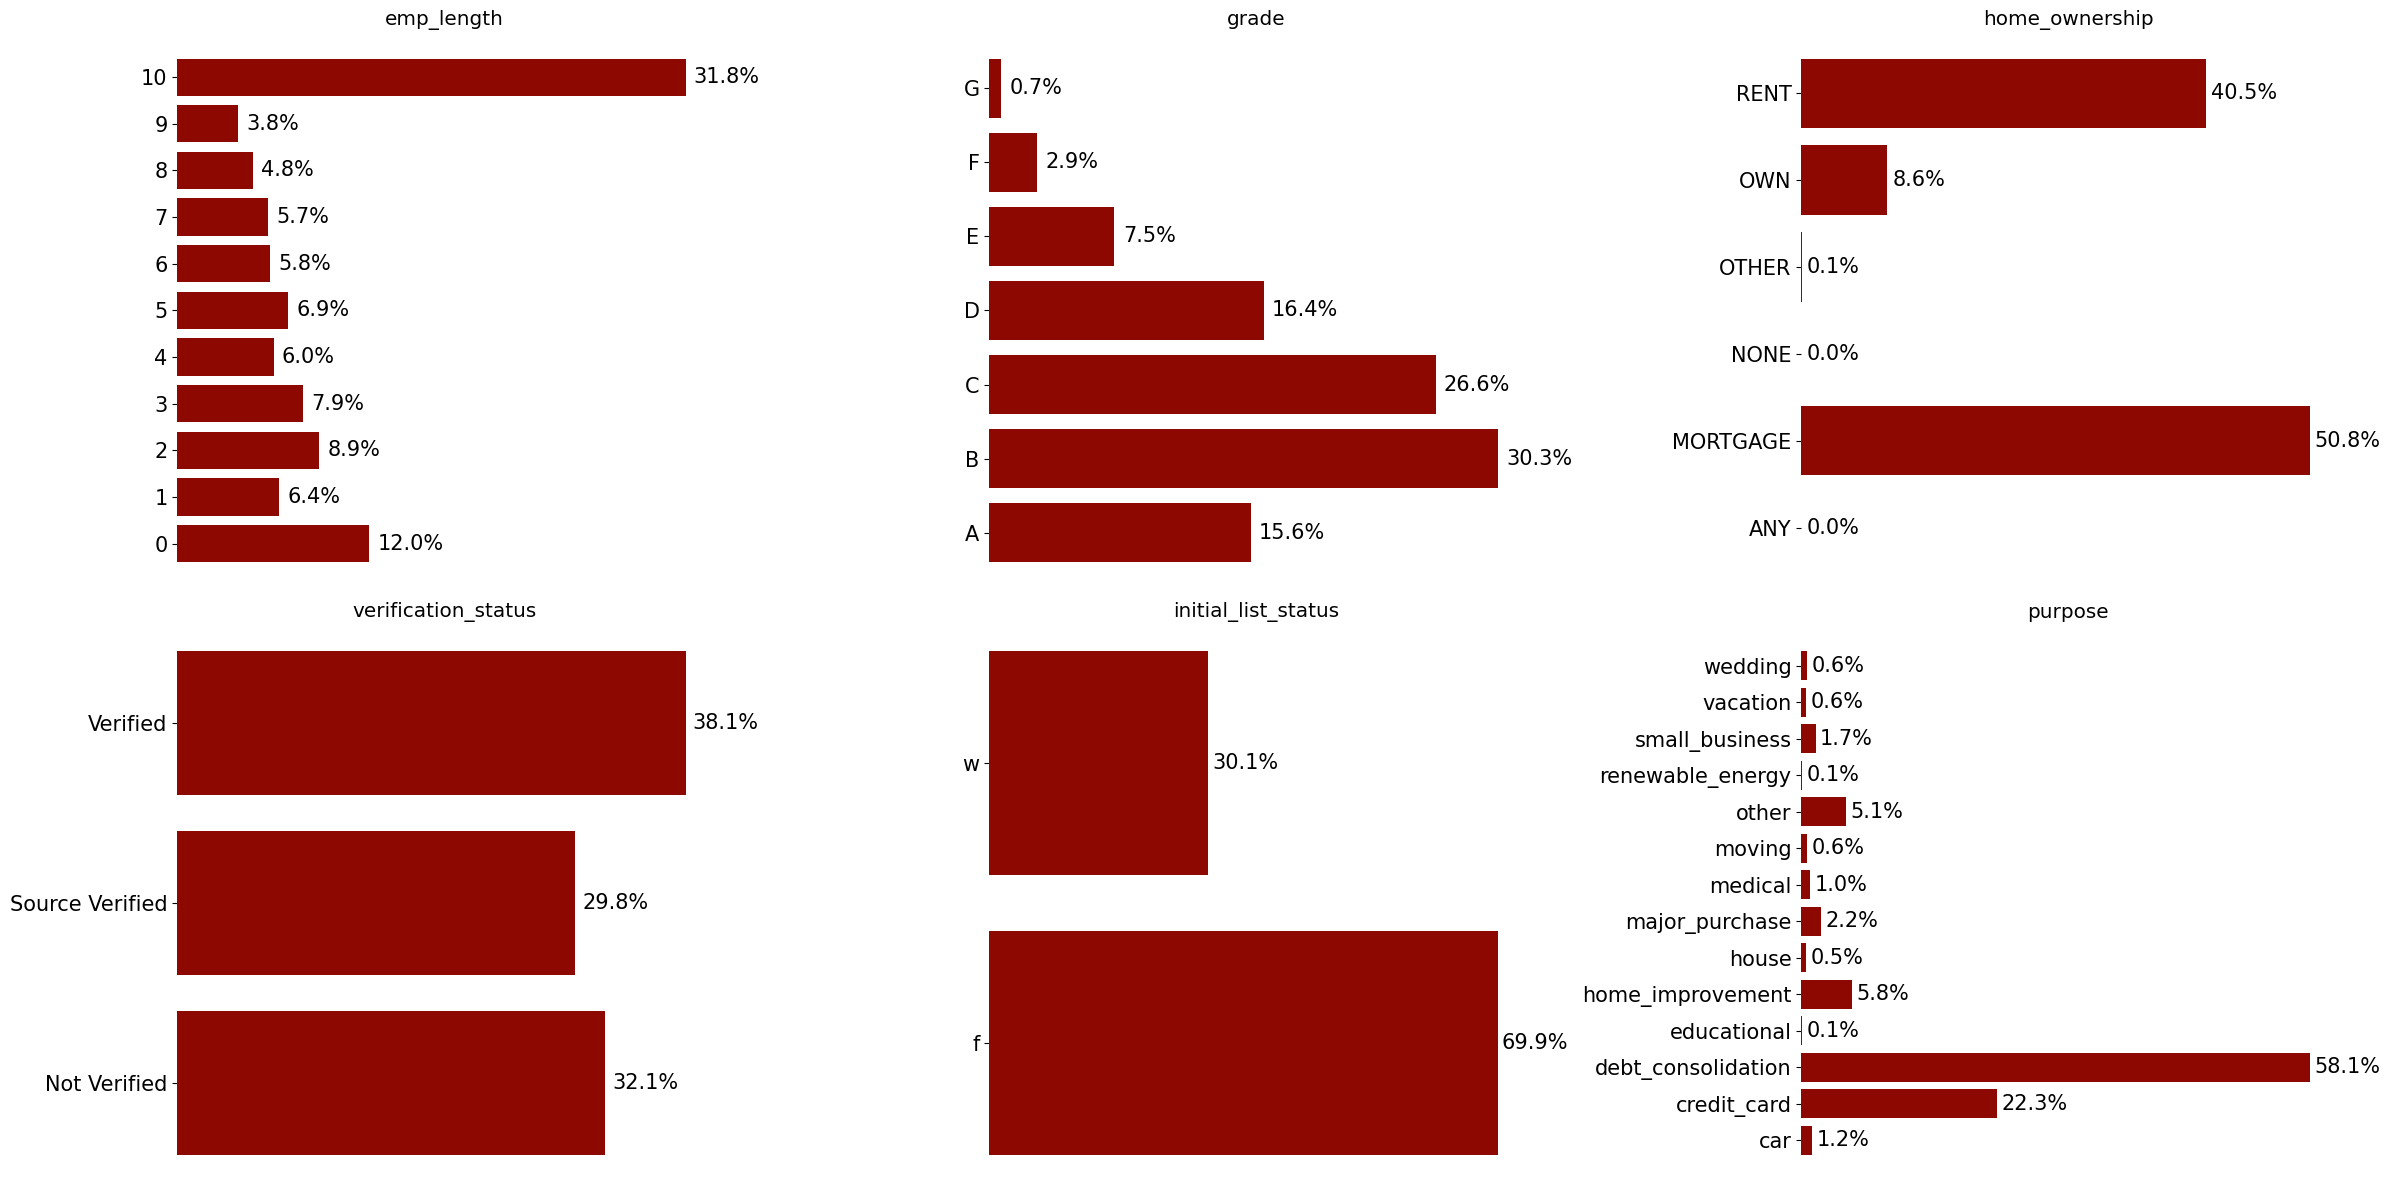

In [21]:
barplot_features = ['emp_length', 'grade', 'home_ownership', 'verification_status', 'initial_list_status', 'purpose']
univariate_analysis_plots(data=train, features=barplot_features, barplot=True, figsize=(24, 12))

- Insights:
    - Over 30% of the customers have been employed for 10 years or more. Around 12% of customers are just starting their jobs with zero years of employment.
    - Over 90% of the customers either own a house through a mortgage or pay rent. About 8.5% of customers own their houses outright. The categories labeled as 'Other,' 'None,' and 'Any' have very small percentages. These might be combined or removed later during analysis based on how well they help distinguish between good and bad borrowers.
    - Nearly 90% of the customers have grades ranging from A to D, while grades F and G make up less than 4% of the data. Even though they are a small portion, grades F and G might be important in differentiating between good and bad borrowers. Further investigation will be conducted to confirm this.
    - The reason for taking out 80% of the loans is to either consolidate debt or use them for credit card payments.

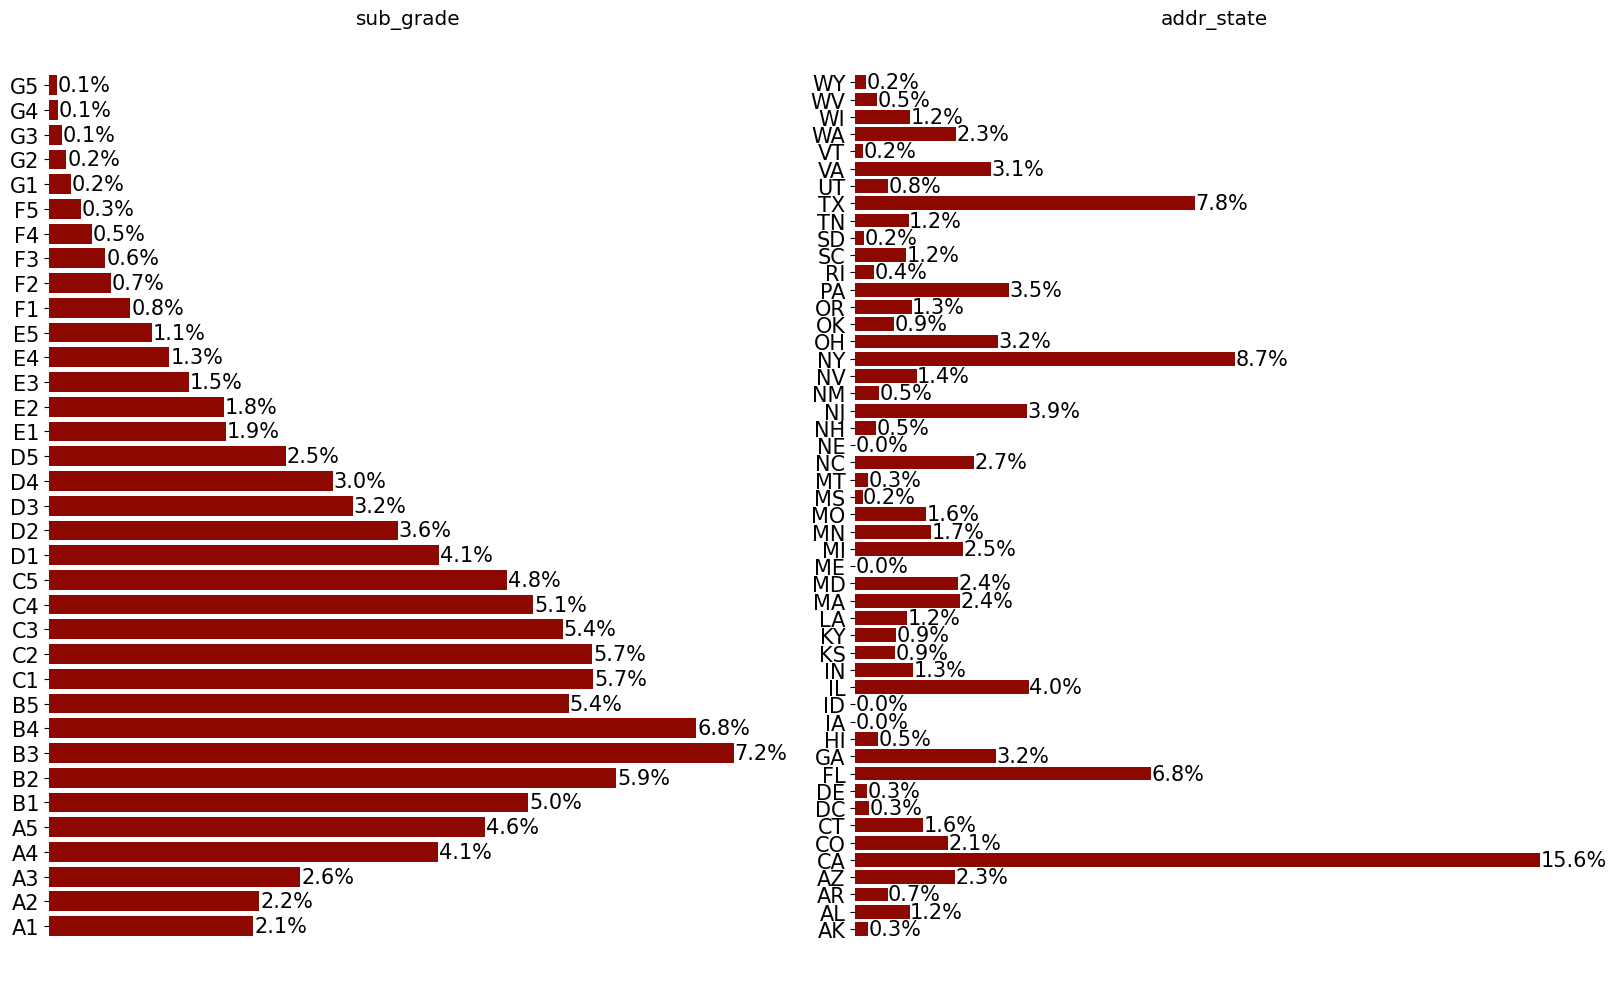

In [22]:
barplot_features = ['sub_grade', 'addr_state']
univariate_analysis_plots(data=train, features=barplot_features, barplot=True, figsize=(24, 10), text_y=0.01)

Insights:
- The states with the highest number of loans are California, New York, Texas, Florida, and Illinois, in that order. California stands out as the top state, making up more than 15% of all loans.

#### 2.7 Bivariate and multivariate analysis
- In this step, I intend to **analyze the relationships between the variables**. My primary focus is on understanding **how each predictor variable relates to the target variable, "default,"** which distinguishes each customer as either a **good or bad borrower**. Moreover, some **objectives** of this task include:
    - Analyze the **discriminatory power** of a **predictor variable.**
    - Identify atypical behaviors and patterns in the variables.
    - Identify **correlations** between predictor variables.
    - Analyze and refine **feature discretization.**
- In building a Logistic Regression PD Model, a crucial step is **discretizing numerical variables** through a process known as **"fine classing."** Here, we **break** down continuous variables into **categories**. Afterward, we evaluate **how well each category distinguishes between good and bad borrowers**, leading to **"coarse classing"** where we **group these categories.** This step is vital for interpretability, as each category turns into a dummy variable. An important observation as that we create n-1 dummies, separating one as a "reference category", the category with highest credit risk. Grouping them, referred to as bundling, **reduces** the model's complexity **(dimensionality)**, improving performance.
- The decision to bundle categories is often guided by the **Weight of Evidence (WoE)** metric. For categorical variables, we order categories by WoE and **bundle** those with **similar discriminatory power.** The process is similar for numerical variables, but here, we order by the variable itself due to its ordinal nature. Adjacent categories with similar WoE are bundled.
    - **WoE** measures how well each feature category discriminates between good and bad borrowers, its formula for a category (i) is:
        - **${WoE}_i = \ln\left(\frac{\%\text{good}_i}{\%\text{bad}_i}\right)$**
- A metric related to WoE is the **Information Value (IV)**. The information value is a measure that helps us understand how well a predictor variable can distinguish between different groups, like good and bad borrowers in our credit scoring scenario. It's calculated by taking the difference between the proportion of good borrowers among all the good ones and the proportion of bad borrowers among all the bad ones, with the values weighted by the Weight of Evidence (WoE), summed across all the categories of the independent variable. This metric is useful for comparing distinct categories bundling and deciding which variables should be included in a credit scoring formula, a pre-selection. However, there are more advanced methods for selecting features, and we will not use IV for it.
    - Information Value (IV) formula:
        - ${IV} = \sum_{i} (\% \text{Good}_i - \% \text{Bad}_i) \times \text{WoE}_i$
- Additionally, it's prudent to **bundle categories with low proportions of observations.** In such cases, WoE may be less reliable, and creating a dummy variable with a coefficient and weight based on a small number of data points can lead to **overfitting**. 
- An important decision is how many categories determine. Generally, based on the feature range, it is recommended from 10 to 20 categories using percentiles. Moreover, it is also recommended that each category must have at least 500 borrowers inside it.
- The entire feature discretization process, considering discriminatory power and bundling categories, will be executed during the preprocessing step. In this phase, we'll carefully examine and determine the specific preprocessing steps to be undertaken, considering the best approach and methodology.
- **Advantages of Feature Discretization:**
    - **Enhanced Understanding:** Allows a clearer understanding of the variable's relationship with loan status (good/bad), identifying categories with higher, neutral, and lower credit risk.
    - **Improved Communication:** Facilitates communication with analysts and business stakeholders, as discretized variables are more easily grasped than complex statistical visualizations like box plots.
    - **Ordinal Analysis:** For ordinal variables, discretization enables the analysis of whether risk variation aligns with the ordering of categories, revealing linear and monotonic relationships with the target variable.
    - **Handling Non-Monotonic Relationships:** In cases where the relationship between a quantitative variable and risk is not monotonic, discretization is beneficial, treating each category independently during dummy variable creation.
    - **Minimizing Asymmetries and Outliers:** Helps mitigate the impact of strong asymmetries and outliers by creating a category for observations above a certain value.
- **Disadvantages of Feature Discretization:**
    - **Information Loss:** Results in information loss as individuals with distinct values are grouped together and treated similarly.
    - **Boundary Effects:** Individuals close to category boundaries may be disproportionately affected, either benefiting or facing disadvantages.
    - **Increased Dimensionality:** Introduces an increase in dimensionality, potentially making the dataset more complex.
- Considering that the advantages outweigh the disadvantages, we will proceed with feature discretization analysis below.
- Moreover, we will **remove highly correlated variables** because it is essential to:
    - **Avoid Multicollinearity:** High correlation between predictors can lead to multicollinearity (although it is measured with the variance inflation factor (VIF), in practice, pearson correlation can give us a good advice), making it challenging to estimate the individual effect of each variable on the target.
    - **Enhance Model Interpretability:** Multicollinearity makes it difficult to interpret the contribution of each feature independently, compromising the clarity and reliability of coefficient estimates.
    - **Improve Model Stability:** Removing correlated features improves model stability, preventing inflated standard errors and unreliable coefficient estimates, which can adversely impact the predictive performance of the PD model.

#### 2.7.1 Are there features significantly correlated with each other?

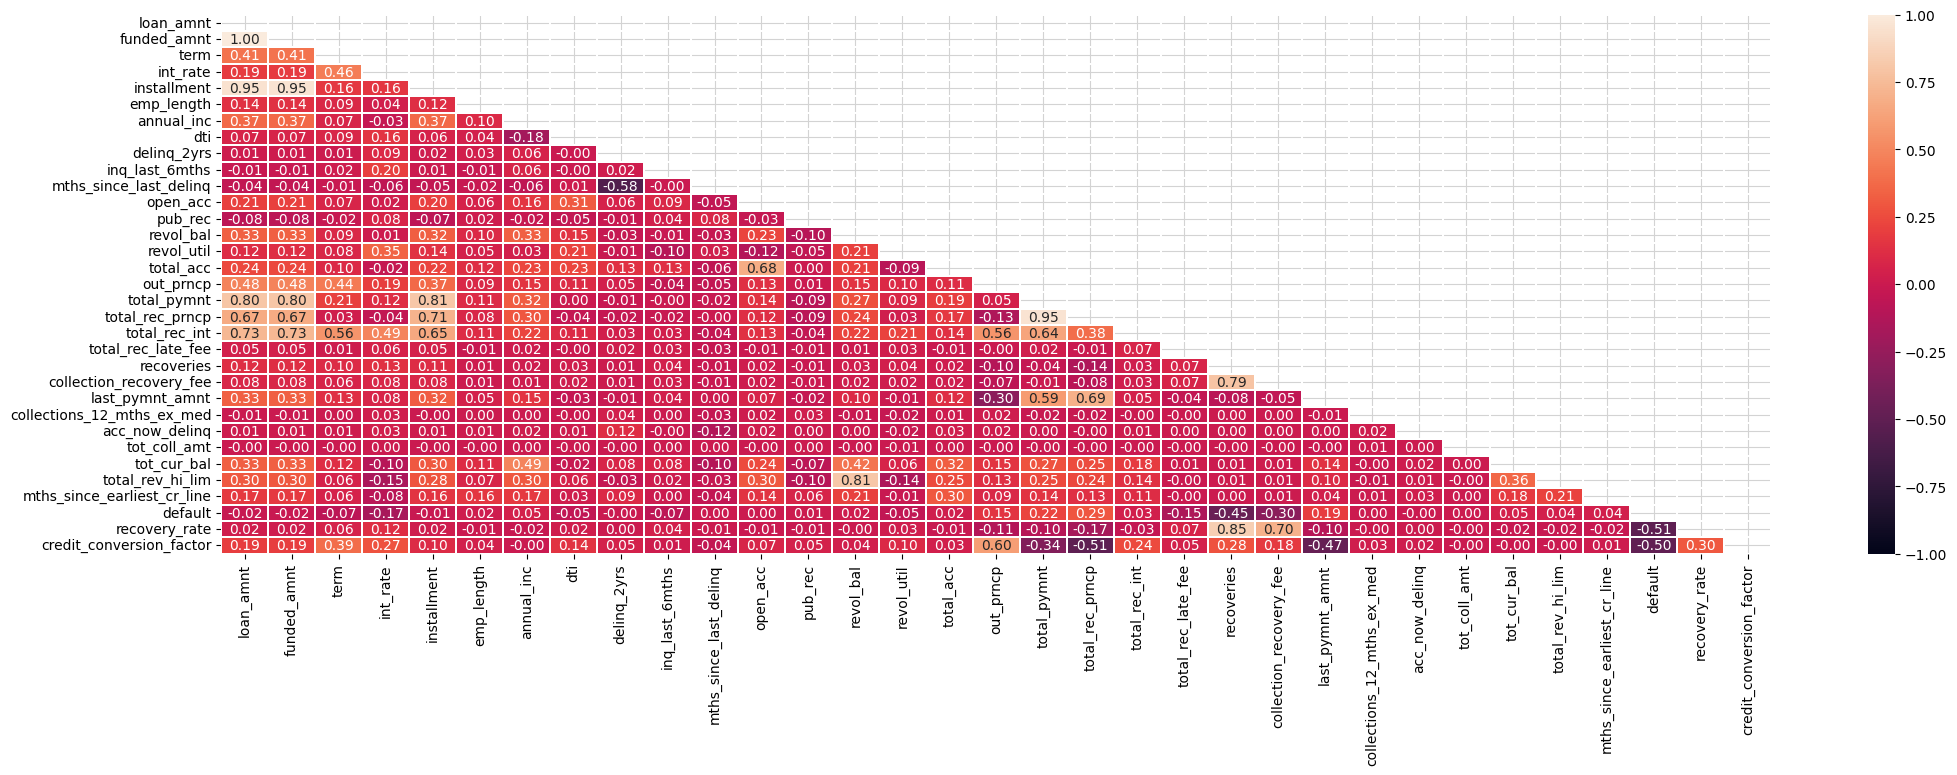

In [23]:
# Mask to remove the upper triangle.
mask = np.zeros_like(train.corr(method='pearson', numeric_only=True), dtype=bool) 
mask[np.triu_indices_from(mask)] = True 

# Correlation matrix.
corr_matrix = train.corr(method='pearson', numeric_only=True)

# Heatmap
plt.figure(figsize=(25, 7))
sns.heatmap(corr_matrix,linewidths=0.25, fmt=".2f", annot=True, vmin=-1, vmax=1, mask=mask)
plt.show()

Insights:
- The credit limit and the revolving balance show a strong positive correlation of 0.81. This means that as the revolving balance increases, so does the credit limit, and vice versa. Since high correlation can lead to multicollinearity, and considering that the variable "total_rev_hi_lim" has a significant number of missing values while "revol_bal" does not, I plan to remove "total_rev_hi_lim" from further analysis. This is to address multicollinearity issues and focus on the available and less incomplete data provided by "revol_bal."
- Other variables, like total payment and loan amount, also show high correlations. This is anticipated because such variables are inherently linked. Additionally, since these variables won't be available at the time of prediction, they will be excluded later to avoid data leakage, ensuring that the model is not using information that wouldn't be accessible in a real-world scenario.

#### 2.7.2 On average, how is the credit amount funded according to the applicants characteristics?

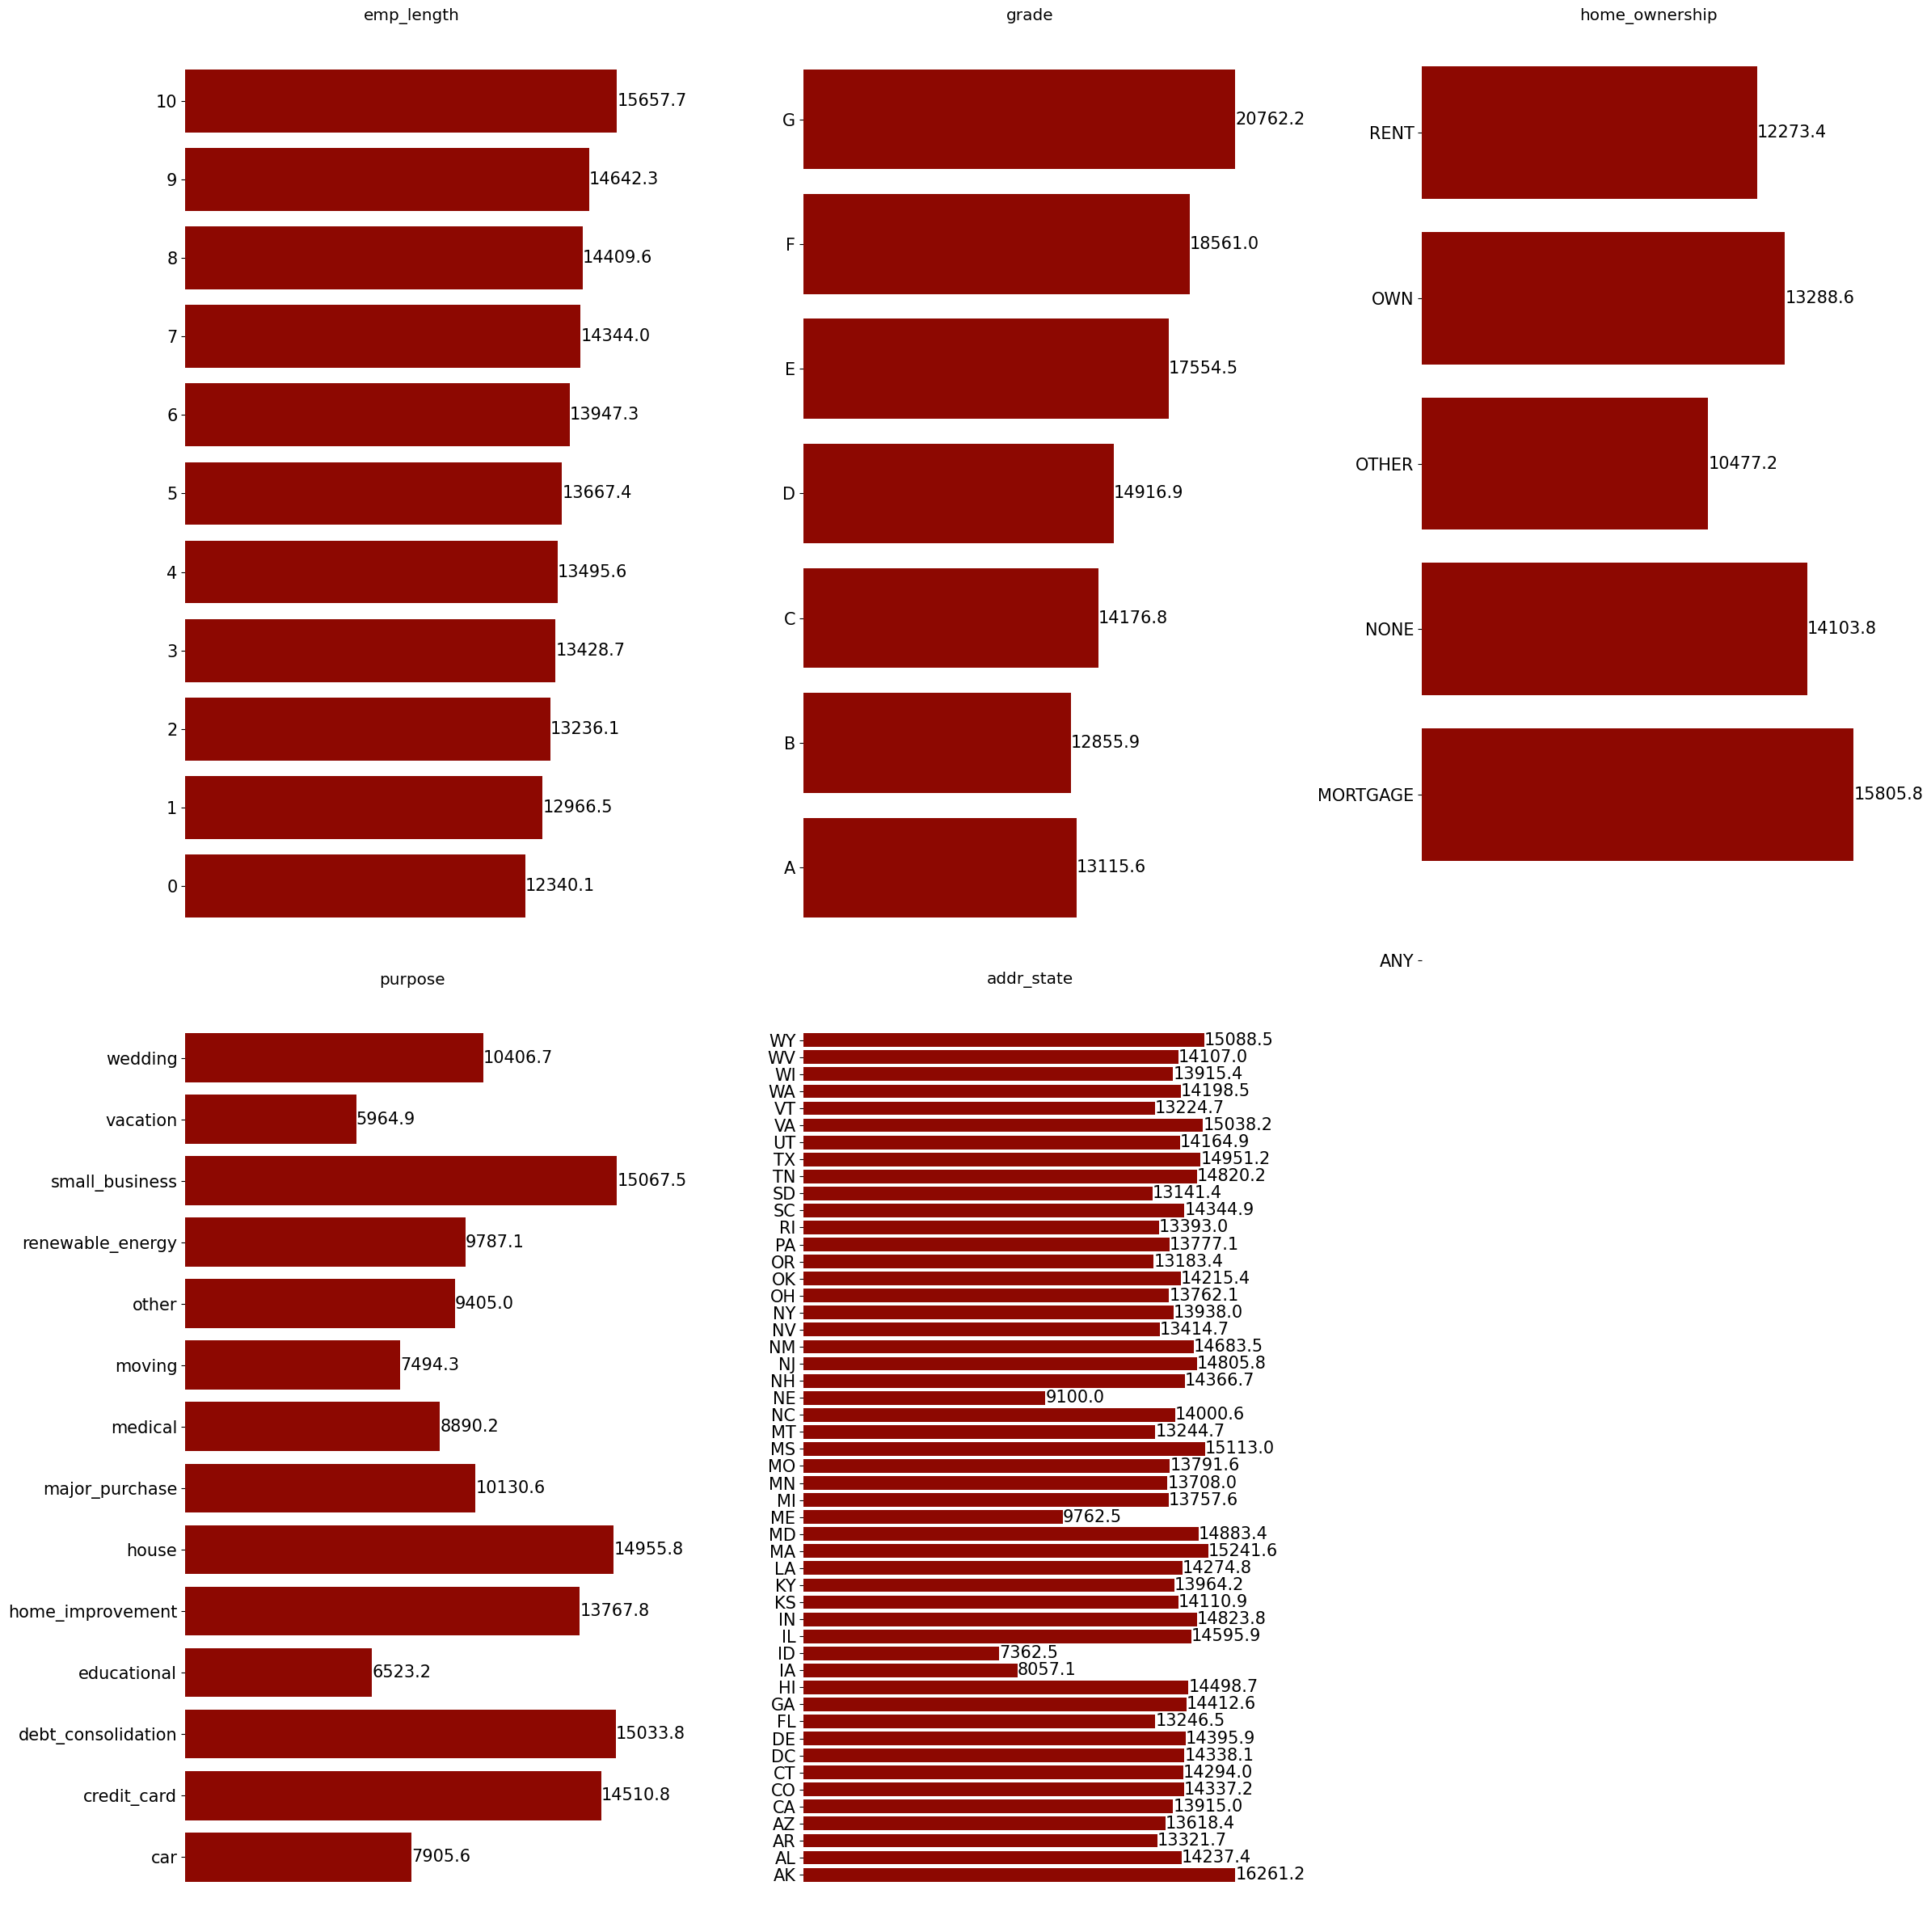

In [24]:
mean_barplot_features = ['emp_length', 'grade', 'home_ownership', 'purpose', 'addr_state']
univariate_analysis_plots(data=train, features=mean_barplot_features, 
                          barplot=True, mean='funded_amnt', figsize=(24, 24))

In [25]:
train.groupby(['term'])['funded_amnt'].mean()

term
36    12141.276046
60    19748.755593
Name: funded_amnt, dtype: float64

Insights:
- The average credit amount funded for 60-month loans is 1.62 times greater than the funded amount for 36-month loans.
- On average, the higher the employee length, the higher the credit amount funded, although the difference is not very substantial. Similarly, the applicant's grade also influences the funded amount positively. Specifically, the average credit amount funded for G grade applicants is 1.58 times higher than the average credit amount funded for A grade applicants. This serves as motivation for our project, highlighting potential discrepancies in Lending Club's decision-making. Allocating more credit to G grade individuals, who constitute a minority and may lead to higher potential losses.
- On average, the highest credit amounts were funded for purposes such as credit card, debt consolidation, house, and small business.
- On average, the credit amount funded is relatively evenly distributed among different states.

#### 2.7.3 How is the distribution of good and bad borrowers across different categories of variables?

#### 2.7.3.1 Grade

In [26]:
grade_df = default_analysis(train['grade'], 'grade', train, continuous=False, not_ordered=True)
grade_df

n_obs  obs_proportion (%)  good_row (%)  bad_row (%)    n_good    n_bad  good_col (%)  bad_col (%)    g/b   woe    iv
grade_cat                                                                                                                        
G            2618                0.70         71.01        28.99    1859.0    759.0          0.57         1.70   2.45  -1.1  0.01
F           10700                2.87         74.64        25.36    7987.0   2713.0          2.43         6.07   2.94 -0.91  0.03
E           27880                7.47         79.07        20.93   22046.0   5834.0          6.72        13.05   3.78 -0.66  0.04
D           61044               16.37         83.27        16.73   50831.0  10213.0         15.48        22.85   4.98 -0.39  0.03
C           99372               26.64         87.30        12.70   86756.0  12616.0         26.43        28.22   6.88 -0.07  0.00
B          113166               30.34         91.21         8.79  103223.0   9943.0         31.44        22.24  10.38  0.35  0.03
A           58224               15.61         95.49         4.51   55598.0   2626.0         16.94         5.87  21.17  1.06  0.12
total      373004              100.00         88.02        11.98  328300.0  44704.0        100.00       100.00      -     -  0.26

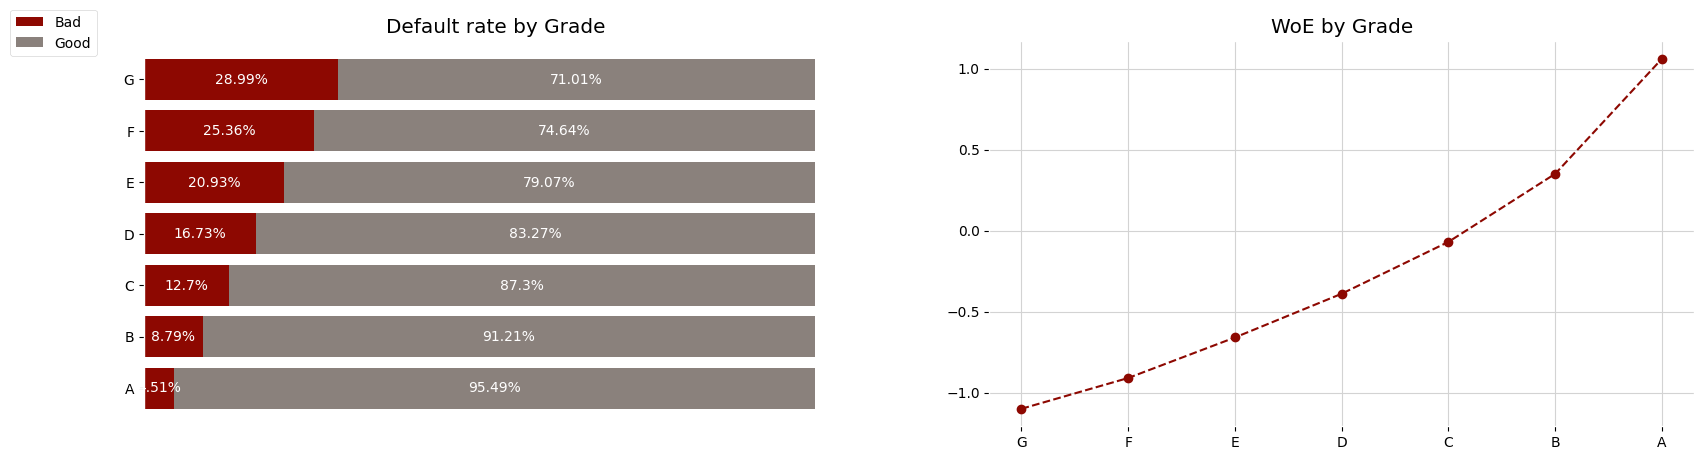

In [27]:
plot_woe_bad_rate_by_variable(grade_df, 'Grade')

Insights:
- It is possible to see a monotonic decreasing in default rate as the applicant's grade increases (from G to A). The higher the applicant's grade, the lower the credit risk. G grade bad rate is 6.4 times higher than A grade bad rate.
- A dummy for each grade can be created because of the significant number of observations per category and distinct discriminatory power, showing the monotonic behavior mentioned above. G will be the reference category as it presents the highest credit risk.

#### 2.7.3.2 Home Ownership

In [28]:
home_own_df = default_analysis(train['home_ownership'], 'home_ownership', train, continuous=False, not_ordered=True)
home_own_df

n_obs  obs_proportion (%)  good_row (%)  bad_row (%)    n_good    n_bad  good_col (%)  bad_col (%)   g/b   woe    iv
home_ownership_cat                                                                                                                       
OTHER                  182                0.05         79.12        20.88     144.0     38.0          0.04         0.09  3.79 -0.66  0.00
NONE                    46                0.01         82.61        17.39      38.0      8.0          0.01         0.02  4.75 -0.44  0.00
RENT                151095               40.51         86.24        13.76  130310.0  20785.0         39.69        46.49  6.27 -0.16  0.01
OWN                  32033                8.59         87.92        12.08   28165.0   3868.0          8.58         8.65  7.28 -0.01  0.00
MORTGAGE            189648               50.84         89.45        10.55  169643.0  20005.0         51.67        44.75  8.48  0.14  0.01
ANY                      0                0.00           NaN          NaN       NaN      NaN           NaN          NaN   NaN   NaN   NaN
total               373004              100.00         88.02        11.98  328300.0  44704.0        100.00       100.00     -     -  0.02

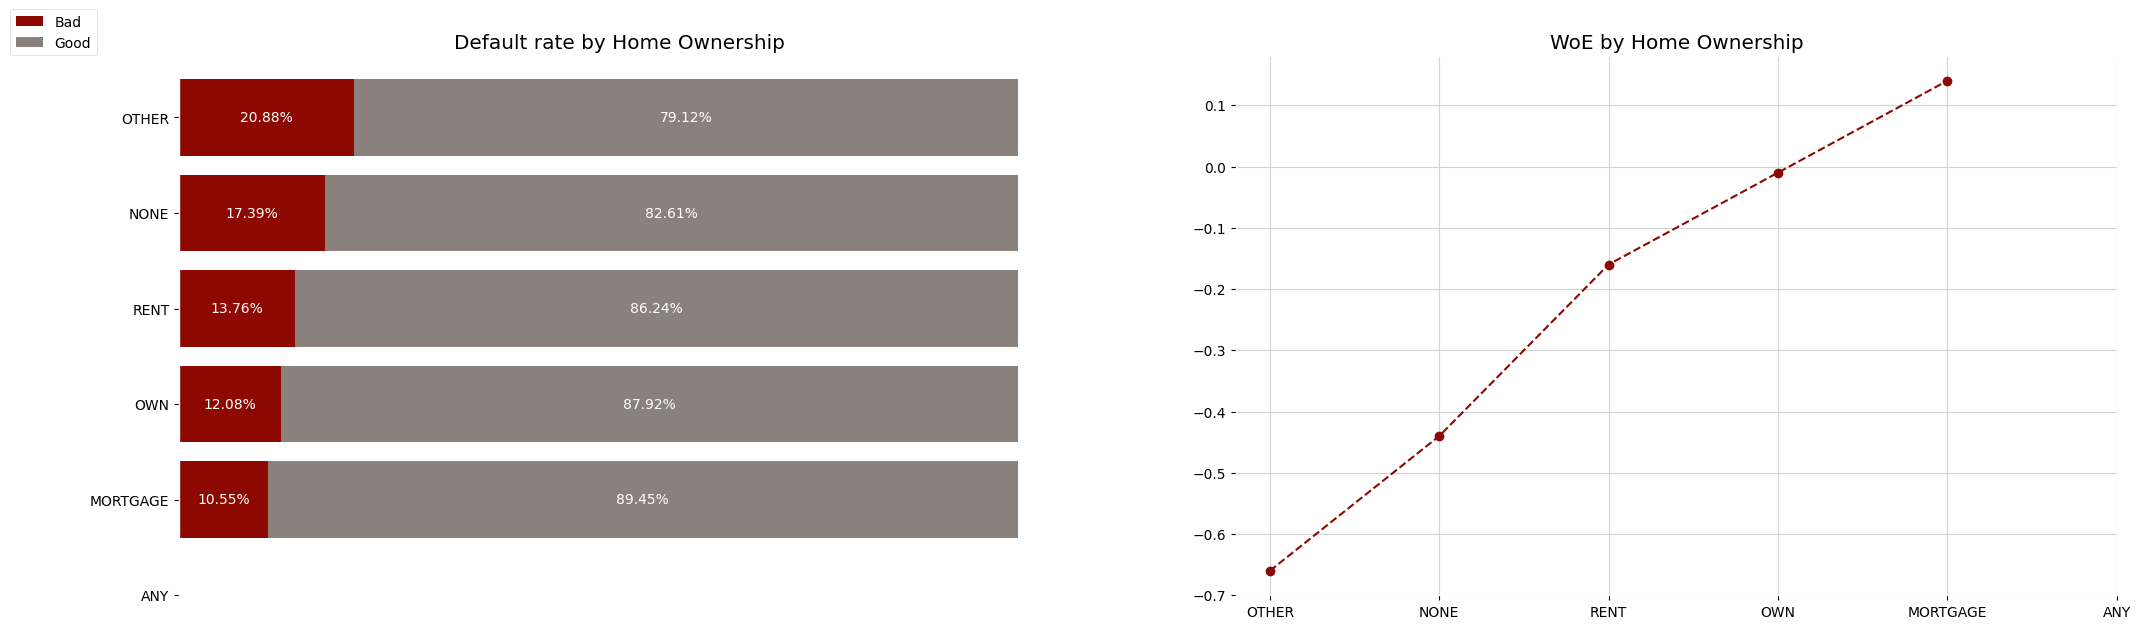

In [29]:
plot_woe_bad_rate_by_variable(home_own_df, 'Home Ownership', figsize=(25, 7))

Insights:
- Once 'Other' and 'None' categories represent a very low number of observations (around 0.06% of the total data), they will be bundled together with 'Rent'. 'Any' will also be grouped with them because it does not have any observation. Probably, a very few 'Any' data points were left in the test set. Once they present the highest credit risk and lowest WoE, these four categories will be grouped and separated as our reference category for home ownership variable.
- 'Own' and 'Mortgage' present significant number of observations and distinct discriminatory powers. Thus, I will create a separate dummy for each one.

#### 2.7.3.3 Purpose

In [30]:
purpose_df = default_analysis(train['purpose'], 'purpose', train, continuous=False, not_ordered=True)
purpose_df

n_obs  obs_proportion (%)  good_row (%)  bad_row (%)    n_good    n_bad  good_col (%)  bad_col (%)   g/b   woe    iv
purpose_cat                                                                                                                              
small_business        6178                1.66         77.08        22.92    4762.0   1416.0          1.45         3.17  3.36 -0.78  0.01
educational            422                0.11         79.15        20.85     334.0     88.0          0.10         0.20   3.8 -0.66  0.00
renewable_energy       292                0.08         82.88        17.12     242.0     50.0          0.07         0.11  4.84 -0.42  0.00
moving                2380                0.64         84.20        15.80    2004.0    376.0          0.61         0.84  5.33 -0.32  0.00
other                19138                5.13         84.84        15.16   16237.0   2901.0          4.95         6.49   5.6 -0.27  0.00
house                 1974                0.53         85.36        14.64    1685.0    289.0          0.51         0.65  5.83 -0.23  0.00
medical               3691                0.99         85.64        14.36    3161.0    530.0          0.96         1.19  5.96 -0.21  0.00
vacation              2037                0.55         87.33        12.67    1779.0    258.0          0.54         0.58   6.9 -0.06  0.00
debt_consolidation  216613               58.07         87.54        12.46  189614.0  26999.0         57.76        60.40  7.02 -0.04  0.00
wedding               2343                0.63         87.84        12.16    2058.0    285.0          0.63         0.64  7.22 -0.02  0.00
home_improvement     21739                5.83         89.46        10.54   19448.0   2291.0          5.92         5.12  8.49  0.14  0.00
major_purchase        8267                2.22         89.85        10.15    7428.0    839.0          2.26         1.88  8.85  0.19  0.00
car                   4643                1.24         90.42         9.58    4198.0    445.0          1.28         1.00  9.43  0.25  0.00
credit_card          83287               22.33         90.47         9.53   75350.0   7937.0         22.95        17.75  9.49  0.26  0.01
total               373004              100.00         88.02        11.98  328300.0  44704.0        100.00       100.00     -     -  0.02

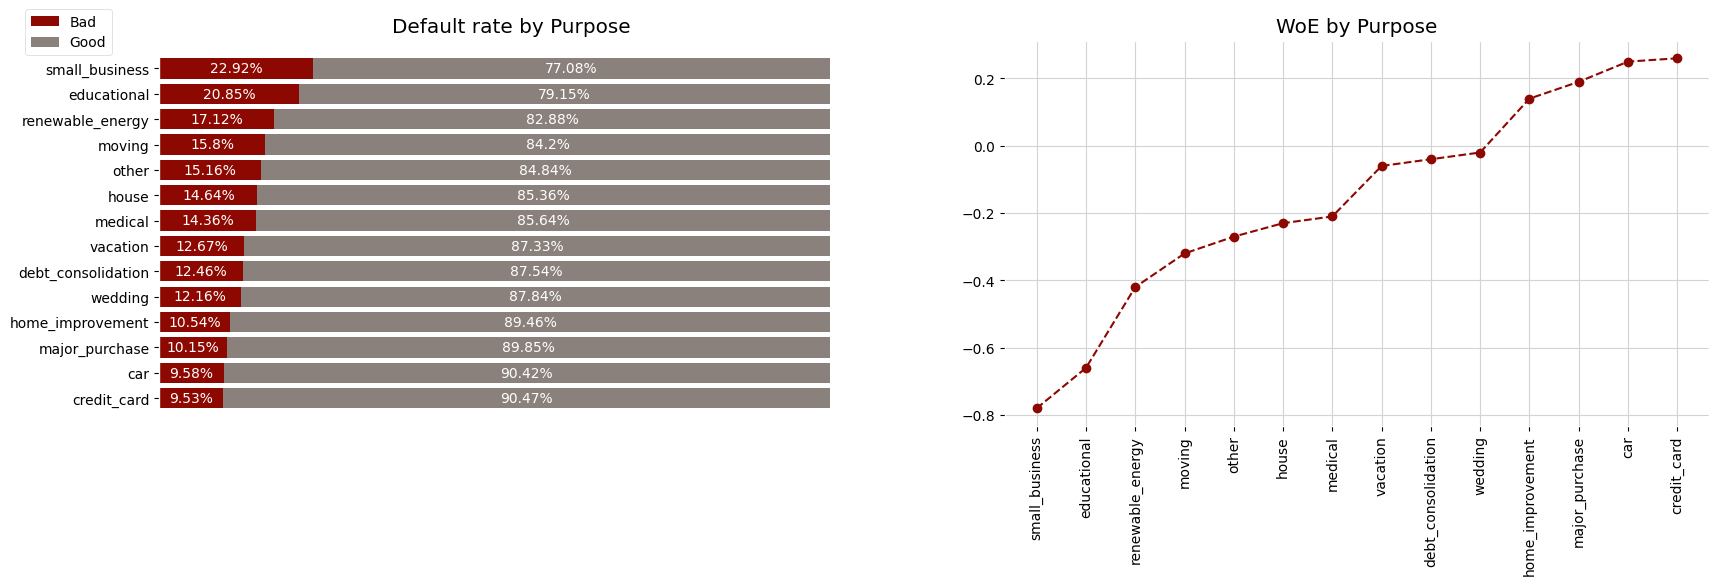

In [31]:
plot_woe_bad_rate_by_variable(purpose_df, 'Purpose', rotation=90)

Insights:
- Small business, educational and renewable energy are the top 3 loans purposes with highest credit risk. Credit card, car and major_purchase are the top 3 with lowest credit risk.
- small_business, educational, renewable_energy and moving will be bundled together due to the low proportions of observations and commonly high credit risk. Once they have the highest WoE (and risk), they will compose our reference category for purpose.
- other, house, medical and vacation will be bundled together due to the low proportions of observations and similar credit risk.
- debt_consolidation will have its own dummy variable because of the high proportion of observations (about 58%).
- wedding, home_improvement, major_purchase and car will be bundled together due to their low proportion of observations and similar risk.
- credit_card will have its own dummy variable because of the high proportion of observations (about 22%).

#### 2.7.3.4 Address State

In [32]:
addr_state_df = default_analysis(train['addr_state'], 'addr_state', train, continuous=False, not_ordered=True)
#addr_state_df

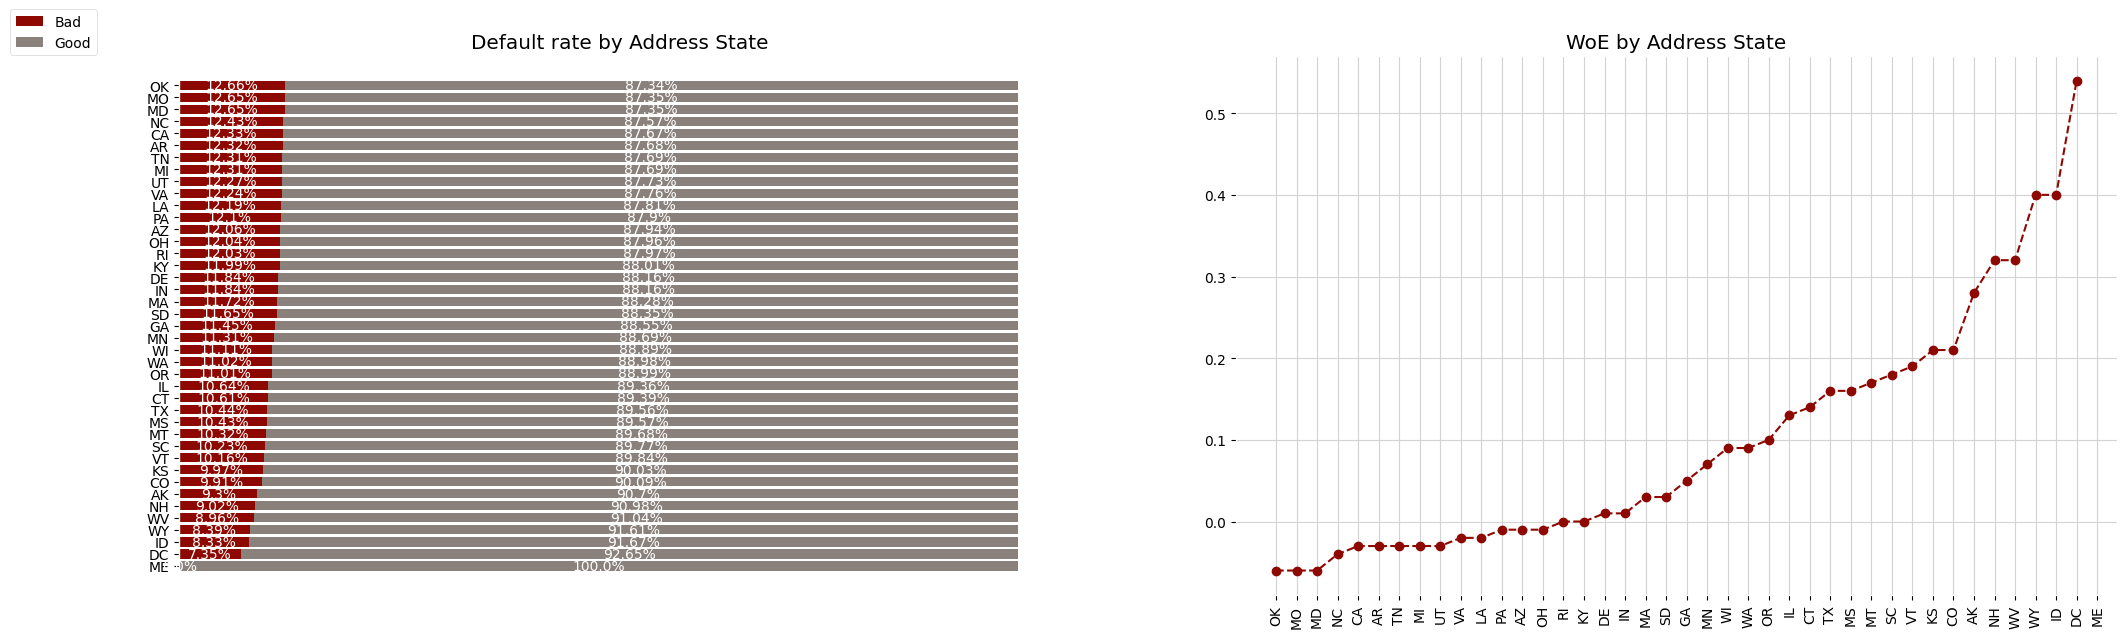

In [33]:
plot_woe_bad_rate_by_variable(addr_state_df.iloc[9:, :], 'Address State', figsize=(25, 7), rotation=90)

Insights:
- NE, IA, NV, HI and FL will be bundled together because of the extremely low proportions of observations, which causes these WoE values. These will compose our reference category for addr_state, because they present the highest risk.
- AL, NM and NJ will be bundled together because of their low proportions of observations and similar WoE.
- NY will have its own dummy variable because of its significant proportion of observations.
- OK, MO, MD and NC will be bundled together because of their low proportions of observations and similar WoE.
- CA will have its own dummy variable because of its significant proportion of observations.
- AR to IN will be bundled together because of their low proportions of observations and similar WoE.
- MA to CT will be bundled together because of their low proportions of observations and similar WoE.
- TX will have its own dummy variable because of its significant proportion of observations.
- MS to ME will be bundled together because of their low proportions of observations and similar WoE.

#### 2.7.3.5 Initial List Status and Verification List Status

In [34]:
initial_list_status_df = default_analysis(train['initial_list_status'], 'initial_list_status', train, continuous=False, not_ordered=True)
initial_list_status_df

n_obs  obs_proportion (%)  good_row (%)  bad_row (%)    n_good    n_bad  good_col (%)  bad_col (%)   g/b   woe    iv
initial_list_status_cat                                                                                                                       
f                        260617               69.87         87.14        12.86  227094.0  33523.0         69.17        74.99  6.77 -0.08  0.00
w                        112387               30.13         90.05         9.95  101206.0  11181.0         30.83        25.01  9.05  0.21  0.01
total                    373004              100.00         88.02        11.98  328300.0  44704.0        100.00       100.00     -     -  0.01

In [35]:
verification_status_df = default_analysis(train['verification_status'], 'verification_status', train, continuous=False, not_ordered=True)
verification_status_df

n_obs  obs_proportion (%)  good_row (%)  bad_row (%)    n_good    n_bad  good_col (%)  bad_col (%)   g/b   woe    iv
verification_status_cat                                                                                                                       
Verified                 142081               38.09         86.44        13.56  122821.0  19260.0         37.41        43.08  6.38 -0.14  0.01
Source Verified          111264               29.83         88.41        11.59   98368.0  12896.0         29.96        28.85  7.63  0.04  0.00
Not Verified             119659               32.08         89.51        10.49  107111.0  12548.0         32.63        28.07  8.54  0.15  0.01
total                    373004              100.00         88.02        11.98  328300.0  44704.0        100.00       100.00     -     -  0.02

Insights:
- Although initial_list_status and verification_status does not show a strong discriminatory power, there is some discrimination between good and bad borrowers across its categories. Thus, dummies will be created for each of them. The reference categories will be those with highest credit risk or lowest WoE. In case they are not useful for predicting PD, we can remove using p-values or another feature selection method later.

#### 2.7.3.6 Sub Grade

In [36]:
sub_grade_df = default_analysis(train['sub_grade'], 'sub_grade', train, continuous=False, not_ordered=True)
#sub_grade_df

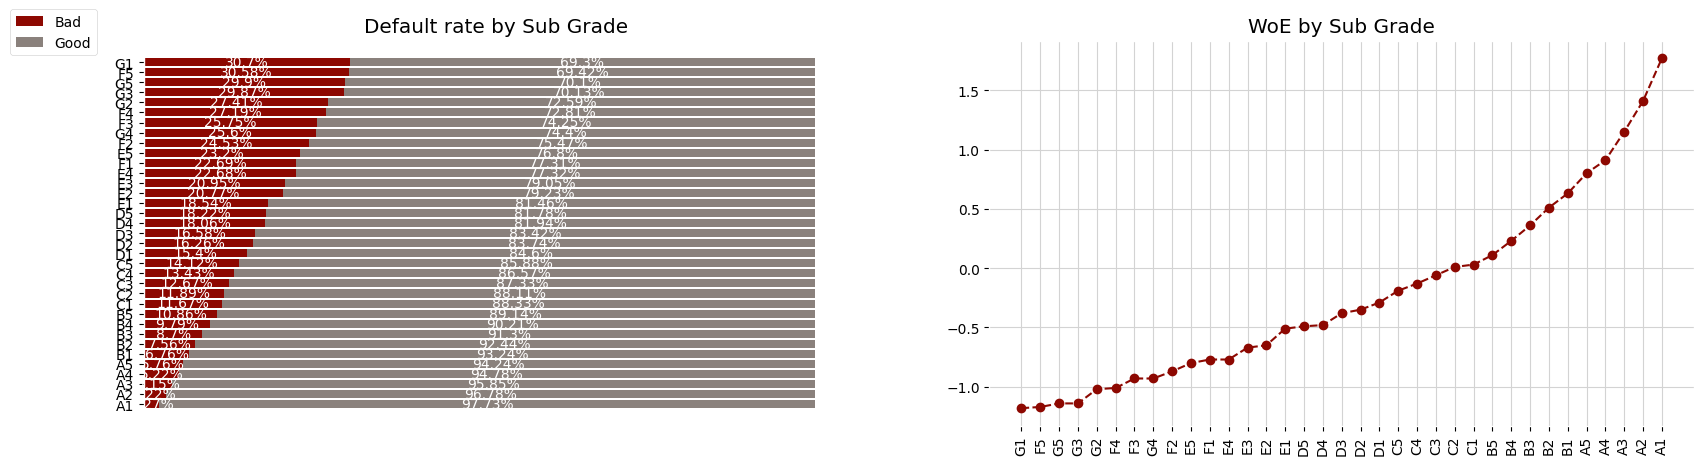

In [37]:
plot_woe_bad_rate_by_variable(sub_grade_df, 'Sub Grade', rotation=90)

Insights:
- As expected, the bad rate consistently decreases monotonically as the subgrade increases.
- G1 to F2 will be bundled together because they present low proportions of observations and similar WoE. Moreover, once they present the highest credit risk and lowest WoE, they will be our reference category for this variable.
- E5 to E2 will be bundled together because of their similar WoE and low proportions of observations. E1 to D4, D3 to D1, C5 to C3, C2 to B5, B4 and B3, B2 and B1, A5 and A4 will also be bundled because of similar WoE. Finally, A3 to A1 present similar WoE and a small number of observations and will be grouped too.

#### 2.7.3.7 Term

In [38]:
term_df = default_analysis(train['term'], 'term', train, continuous=False, not_ordered=True)
term_df

n_obs  obs_proportion (%)  good_row (%)  bad_row (%)    n_good    n_bad  good_col (%)  bad_col (%)   g/b   woe    iv
term_cat                                                                                                                       
60         98782               26.48         84.04        15.96   83014.0  15768.0         25.29        35.27  5.26 -0.33  0.03
36        274222               73.52         89.45        10.55  245286.0  28936.0         74.71        64.73  8.48  0.14  0.01
total     373004              100.00         88.02        11.98  328300.0  44704.0        100.00       100.00     -     -  0.04

Insights:
- 60-month term loans tend to present higher risk. The bad rate on it (about 16%) is 1.5 times higher 36-month term bad rate (about 10.5%).
- Term will have its own dummy created because it presents a significant discriminatory power. Moreover, 60-month term will be the reference category because it presents the highest risk.

#### 2.7.3.8 Employee Length

In [39]:
emp_len_df = default_analysis(train['emp_length'], 'emp_length', train, continuous=False, not_ordered=False)
emp_len_df

n_obs  obs_proportion (%)  good_row (%)  bad_row (%)    n_good    n_bad  good_col (%)  bad_col (%)   g/b   woe   iv
emp_length_cat                                                                                                                      
0                44830               12.02         86.50        13.50   38779.0   6051.0         11.81        13.54  6.41 -0.14  0.0
1                23816                6.38         87.86        12.14   20925.0   2891.0          6.37         6.47  7.24 -0.01  0.0
2                33148                8.89         87.94        12.06   29152.0   3996.0          8.88         8.94   7.3 -0.01  0.0
3                29331                7.86         87.96        12.04   25800.0   3531.0          7.86         7.90  7.31 -0.01  0.0
4                22456                6.02         87.91        12.09   19742.0   2714.0          6.01         6.07  7.27 -0.01  0.0
5                25890                6.94         87.59        12.41   22678.0   3212.0          6.91         7.19  7.06 -0.04  0.0
6                21746                5.83         87.28        12.72   18980.0   2766.0          5.78         6.19  6.86 -0.07  0.0
7                21239                5.69         87.79        12.21   18646.0   2593.0          5.68         5.80  7.19 -0.02  0.0
8                17752                4.76         87.86        12.14   15597.0   2155.0          4.75         4.82  7.24 -0.01  0.0
9                14138                3.79         87.65        12.35   12392.0   1746.0          3.77         3.91   7.1 -0.03  0.0
10              118658               31.81         89.00        11.00  105609.0  13049.0         32.17        29.19  8.09   0.1  0.0
total           373004              100.00         88.02        11.98  328300.0  44704.0        100.00       100.00     -     -  0.0

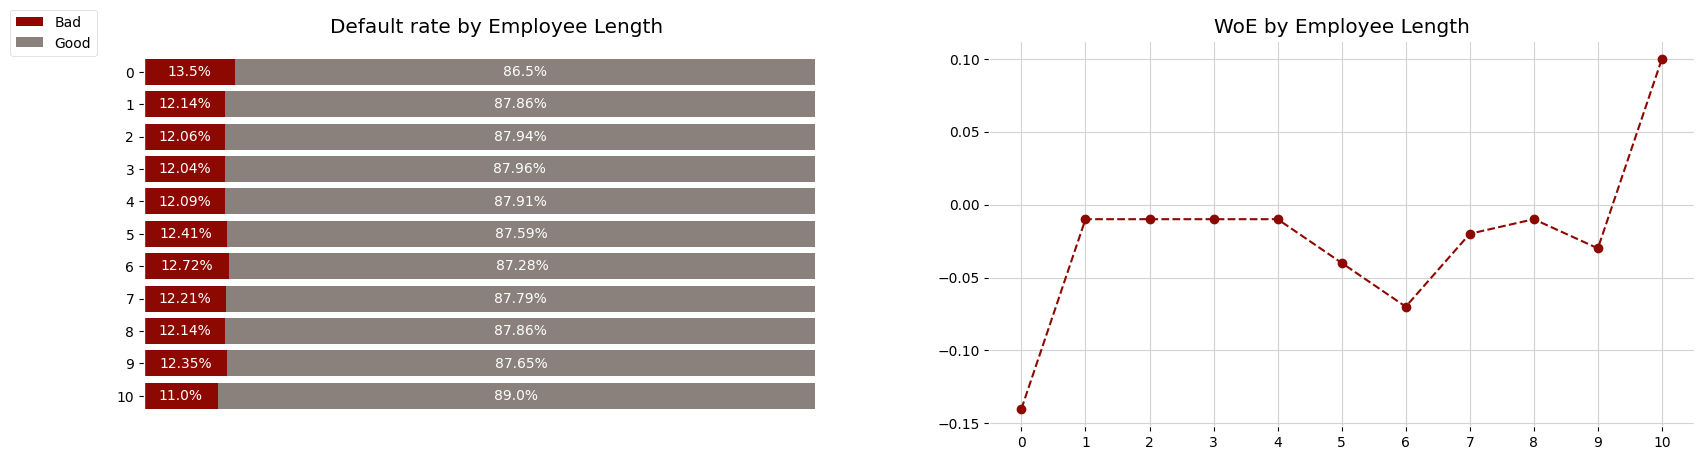

In [40]:
plot_woe_bad_rate_by_variable(emp_len_df, 'Employee Length')

Insights:
- All the employee length categories have similar bad rates. However, there is a very slight trend indicating that shorter employee lengths may be riskier.
- 0 will be the reference category because it present the lowest WoE and highest credit risk.
- 1, 2, and 3, and 4, 5, and 6 will be bundled together because they present similar or same WoE and these are convenient categories to the business point of view.
- 7, 8 and 9 will be bundled together because they present similar WoE.
- 10 will have its own dummy variable because it has the highest proportion of observations and distinct WoE (also the highest).

#### 2.7.3.9 Interest Rate

In [41]:
int_rate_df = default_analysis(pd.cut(train['int_rate'], 10), 'int_rate', train, continuous=True, not_ordered=False)
int_rate_df

n_obs  obs_proportion (%)  good_row (%)  bad_row (%)    n_good    n_bad  good_col (%)  bad_col (%)    g/b   woe    iv
int_rate_cat                                                                                                                        
5-7            19492                5.23         97.02         2.98   18911.0    581.0          5.76         1.30  32.55  1.49  0.07
7-10           42064               11.28         94.81         5.19   39880.0   2184.0         12.15         4.89  18.26  0.91  0.07
10-12          49071               13.16         92.13         7.87   45209.0   3862.0         13.77         8.64  11.71  0.47  0.02
12-14          73302               19.65         90.07         9.93   66023.0   7279.0         20.11        16.28   9.07  0.21  0.01
14-16          70651               18.94         87.79        12.21   62028.0   8623.0         18.89        19.29   7.19 -0.02  0.00
16-18          50869               13.64         83.83        16.17   42646.0   8223.0         12.99        18.39   5.19 -0.35  0.02
18-20          31693                8.50         81.35        18.65   25783.0   5910.0          7.85        13.22   4.36 -0.52  0.03
20-22          16967                4.55         79.47        20.53   13484.0   3483.0          4.11         7.79   3.87 -0.64  0.02
22-24          12318                3.30         75.96        24.04    9357.0   2961.0          2.85         6.62   3.16 -0.84  0.03
24-26           6577                1.76         75.70        24.30    4979.0   1598.0          1.52         3.57   3.12 -0.86  0.02
total         373004              100.00         88.02        11.98  328300.0  44704.0        100.00       100.00      -     -  0.29

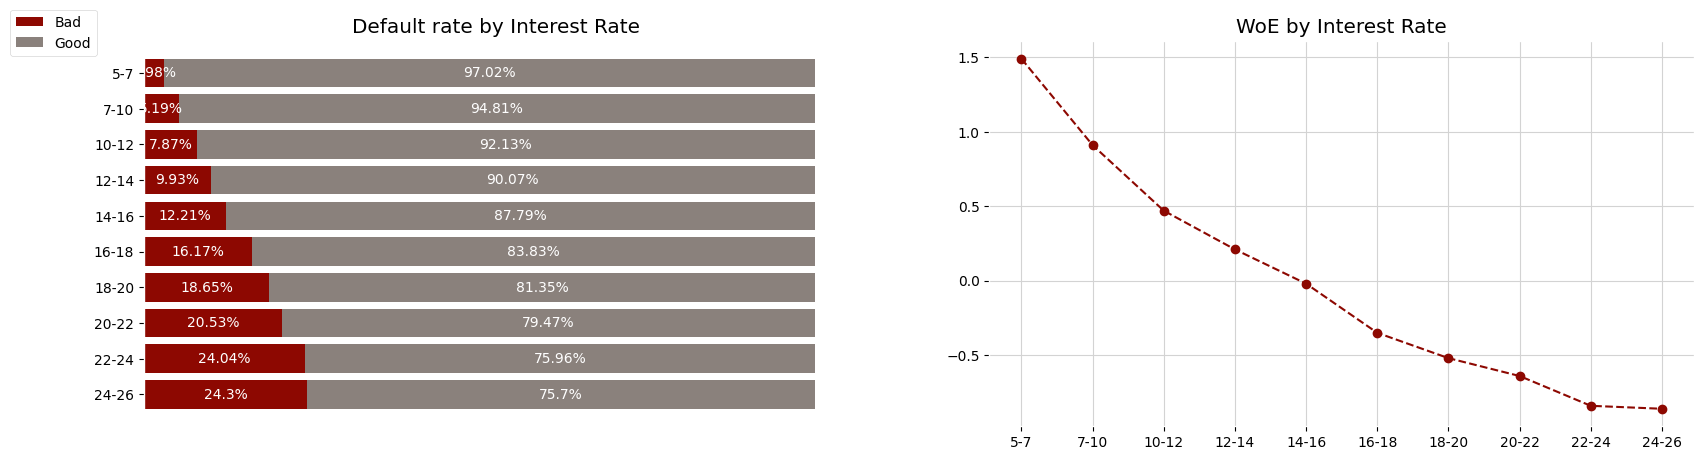

In [42]:
plot_woe_bad_rate_by_variable(int_rate_df, 'Interest Rate')

Insights:
- It is possible to see that the bad rate consistenly increases monotonically as the interest rate increases. Higher interest rates represent higher credit risk. Specifically, loans with more than 20% interest rate present about 8 times higher bad rate than those with 5% to 7% interest rate.
- 5-7, 7-10, 10-12, 12-14, 14-16, 16-18 will have their own category because of their distinct WoE.
- 18-20 and 20-22 will be bundled together because of their similar WoE.
- 22-24 and 24-26 will be bundled together because of their similar WoE. Moreover, these categories represent the highest credit risk and lowest WoE. Thus, they will be our reference category for interest rate.

#### 2.7.3.10 Loan Amount

In [43]:
loan_amnt_df = default_analysis(pd.cut(train['loan_amnt'], 10), 'loan_amnt', train, continuous=True, not_ordered=False)
loan_amnt_df

n_obs  obs_proportion (%)  good_row (%)  bad_row (%)    n_good    n_bad  good_col (%)  bad_col (%)   g/b   woe   iv
loan_amnt_cat                                                                                                                      
466-3950        22765                6.10         88.33        11.67   20109.0   2656.0          6.13         5.94  7.57  0.03  0.0
3950-7400       61364               16.45         88.78        11.22   54479.0   6885.0         16.59        15.40  7.91  0.07  0.0
7400-10850      74362               19.94         88.11        11.89   65522.0   8840.0         19.96        19.77  7.41  0.01  0.0
10850-14300     52014               13.94         88.58        11.42   46075.0   5939.0         14.03        13.29  7.76  0.05  0.0
14300-17750     48429               12.98         87.73        12.27   42489.0   5940.0         12.94        13.29  7.15 -0.03  0.0
17750-21200     46326               12.42         87.72        12.28   40636.0   5690.0         12.38        12.73  7.14 -0.03  0.0
21200-24650     20216                5.42         87.57        12.43   17704.0   2512.0          5.39         5.62  7.05 -0.04  0.0
24650-28100     20543                5.51         87.22        12.78   17918.0   2625.0          5.46         5.87  6.83 -0.07  0.0
28100-31550     10570                2.83         86.21        13.79    9112.0   1458.0          2.78         3.26  6.25 -0.16  0.0
31550-35000     16415                4.40         86.85        13.15   14256.0   2159.0          4.34         4.83   6.6 -0.11  0.0
total          373004              100.00         88.02        11.98  328300.0  44704.0        100.00       100.00     -     -  0.0

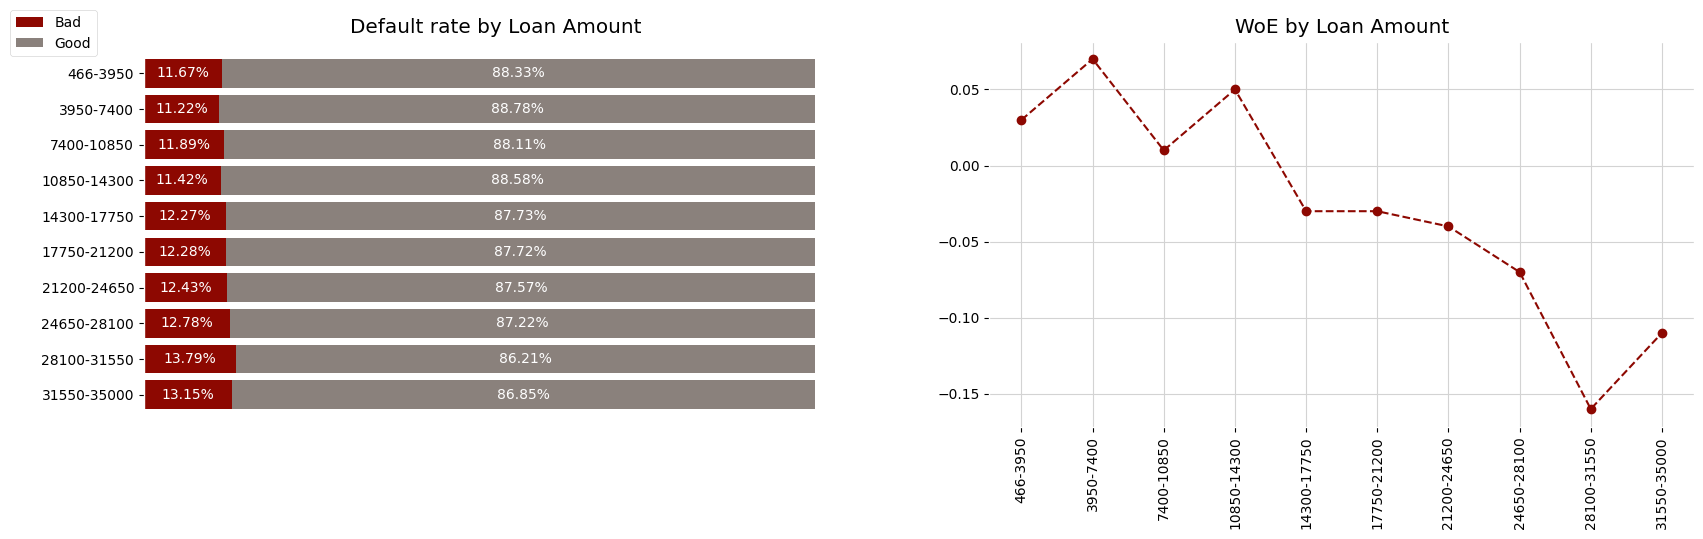

In [44]:
plot_woe_bad_rate_by_variable(loan_amnt_df, 'Loan Amount', rotation=90)

Insights:
- The bad rates are fairly distributed across different loan amount bins. 
- Loan Amounts from 466 to 7,400, 7,400 to 14,300, 14,300 to 21,200 and 21,200 to 28,100 will be bundled together because of their similar WoE. 
- Loan Amounts from 28100 to 35000 will be bundled together because of their similar WoE. Moreover, once these categories present the higher credit risks, they will be our reference category for loan amount variable.

#### 2.7.3.11 Debt to Income

In [45]:
dti_df = default_analysis(pd.cut(train['dti'], 10), 'dti', train, continuous=True, not_ordered=False)
dti_df

n_obs  obs_proportion (%)  good_row (%)  bad_row (%)    n_good    n_bad  good_col (%)  bad_col (%)   g/b   woe    iv
dti_cat                                                                                                                       
0-4       14277                3.83         89.82        10.18   12823.0   1454.0          3.91         3.25  8.82  0.18  0.00
4-8       35629                9.55         90.55         9.45   32263.0   3366.0          9.83         7.53  9.58  0.27  0.01
8-12      56854               15.24         89.74        10.26   51022.0   5832.0         15.54        13.05  8.75  0.18  0.00
12-16     69800               18.71         89.04        10.96   62151.0   7649.0         18.93        17.11  8.13   0.1  0.00
16-20     68046               18.24         87.76        12.24   59717.0   8329.0         18.19        18.63  7.17 -0.02  0.00
20-24     57297               15.36         86.46        13.54   49541.0   7756.0         15.09        17.35  6.39 -0.14  0.00
24-28     39242               10.52         85.79        14.21   33665.0   5577.0         10.25        12.48  6.04  -0.2  0.00
28-32     22799                6.11         85.26        14.74   19438.0   3361.0          5.92         7.52  5.78 -0.24  0.00
32-36      8899                2.39         84.74        15.26    7541.0   1358.0          2.30         3.04  5.55 -0.28  0.00
36-40       161                0.04         86.34        13.66     139.0     22.0          0.04         0.05  6.32 -0.15  0.00
total    373004              100.00         88.02        11.98  328300.0  44704.0        100.00       100.00     -     -  0.01

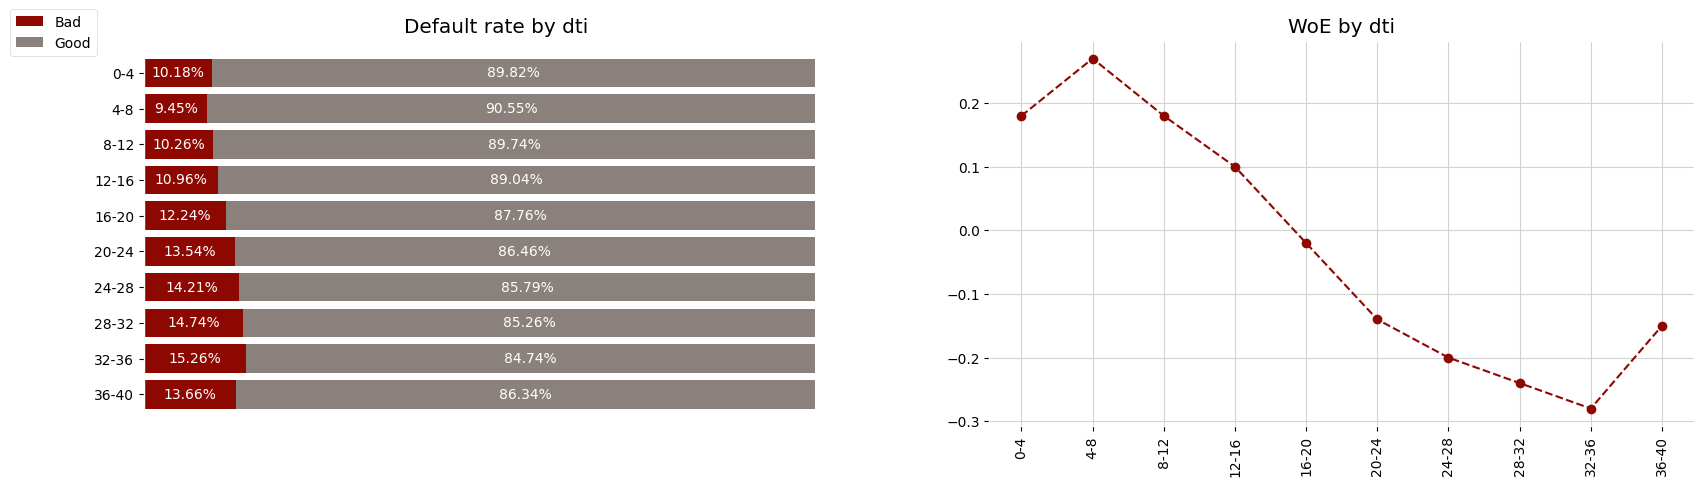

In [46]:
plot_woe_bad_rate_by_variable(dti_df, 'dti', rotation=90)

Insights:
- Although the differences are not so expressive, the highest the debt-to-income ratio, the highest the credit risk. Applicants with a debt-to-income ratio of 32 to 36 percent present a 1.5 times higher default rate compared to applicants with a debt-to-income ratio of 0 to 4 percent.
- 0-4, 4-8, 8-12, 12-16, 16-20, will have their own dummy variable because of their distinct WoE, significant number of observations and because they are interest categories to the business point of view.
- 20-24 and 24-28 will be bundled together because of their similar WoE. 
- 28-32, 32-36 and 36-40 will be bundled together because of their similar WoE. Moreover, although 36-40 has a higher WoE, it presents very few observations and thus will be bundled too. These categories represent the highest credit risks. So, they will compose our reference category for dti variable.

#### 2.7.3.12 Annual Income

In [47]:
annual_inc_lower_150 = train.loc[train['annual_inc'] < 150_000]
annual_inc_df = default_analysis(pd.cut(annual_inc_lower_150['annual_inc'], 20), 'annual_inc', annual_inc_lower_150, continuous=True, not_ordered=False)
#annual_inc_df

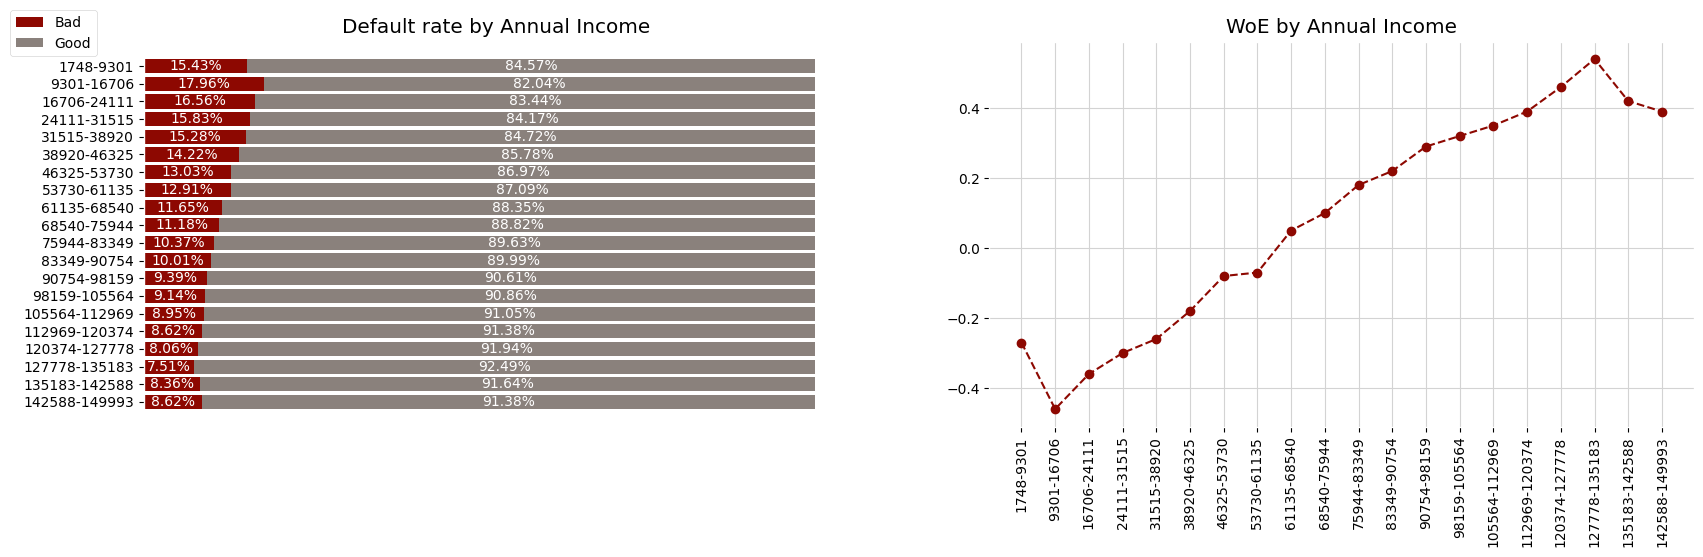

In [48]:
plot_woe_bad_rate_by_variable(annual_inc_df, 'Annual Income', rotation=90)

Insights:
- It is possible to see that the bad rate consistenly decreases monotonically as the annual income increases. Applicants with lower annual incomes present higher credit risk. For example, individuals with annual incomes from 1,748 to 24,111 present a bad rate about two times higher than individuals with 120,000 or higher annual incomes.
- Considering 95% of the annual incomes fall below 150,000 dollars, I will create a separate dummy for incomes greater than this value and analyze WoE and credit risk across categories below it. As mentioned before, this is one way to deal with outliers with feature discretization.
- 1,748 to 16,706 will be bundled together because of the low number of observations. These are the income levels with highest credit risk and lowest WoE. Thus, they will compose our reference category for annual income variable.
- 16,706 to 38,920 will be bundled together because of their similar WoE. The same for 38,920 to 61,135, 61,135 to 75,944, 75,944 to 90,754, 90,754 to 120,374 and 120,374 to 149,993.

#### 2.7.3.13 Months Since Earliest Credit Line

In [49]:
mths_since_earliest_cr_line_df = default_analysis(pd.cut(train['mths_since_earliest_cr_line'], 20), 'mths_since_earliest_cr_line', train, continuous=True, not_ordered=False)
#mths_since_earliest_cr_line_df

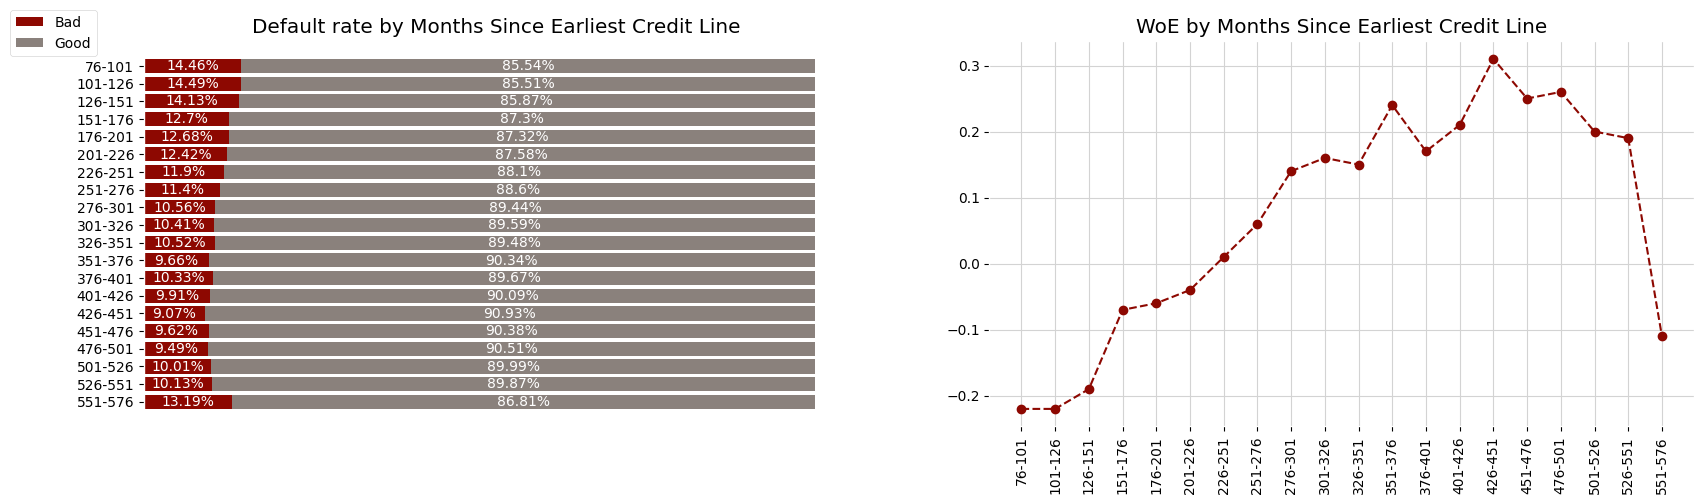

In [50]:
plot_woe_bad_rate_by_variable(mths_since_earliest_cr_line_df, 'Months Since Earliest Credit Line', rotation=90)

Insights:
- Applicants with lower number of months since earliest credit line tend to present significantly higher credit risk, although the difference is not so expressive.
- 76 to 151 will be bundled together because they present quite similar WoE. Moreover, once they have the highest credit risk and lowest WoE, they will be our reference category for months since earliest credit line variable.
- 151 to 226 will be bundled together because they present similar WoE. The same is true for 226 to 276, 276 to 401 and 401 to 576 (considering some categories have very few observations too).

#### 2.7.3.14 Revolving Balance

In [51]:
revol_bal_lower_40 = train.loc[train['revol_bal'] < 40_000]
revol_bal_df = default_analysis(pd.cut(revol_bal_lower_40['revol_bal'], 20), 'revol_bal', revol_bal_lower_40, continuous=True, not_ordered=False)
#revol_bal_df

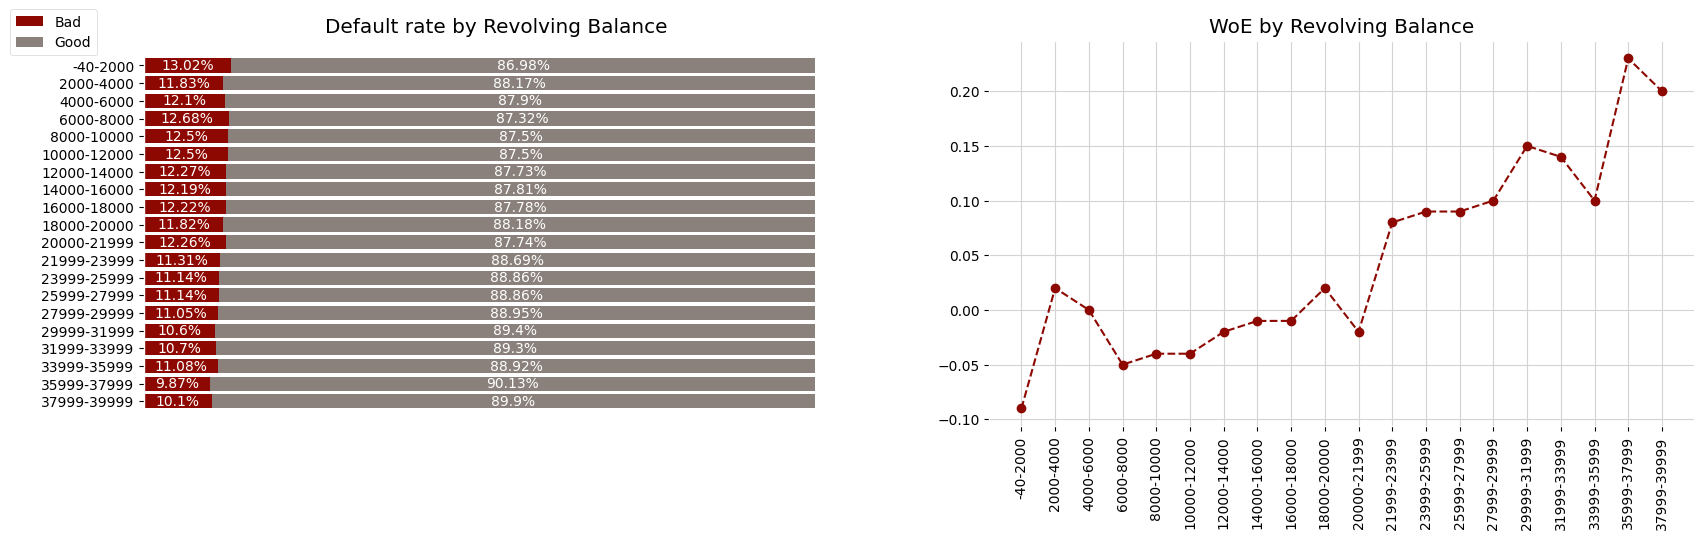

In [52]:
plot_woe_bad_rate_by_variable(revol_bal_df, 'Revolving Balance', rotation=90)

Insights:
- Considering about 95% of the applicants have a revolving balance lower than 40,000 dollars, I will create a separate dummy for revolving balances higher than this value and analyze WoE across categories below it.
- 0 to 2,000 will have its own dummy variable because of its distinct WoE and significant number of observations. Moreover, this is the category with highest credit risk and lowest WoE, and thus will compose our reference category for revolving balance variable.
- 2,000 to 6,000 will be bundled together because of their similar WoE. The same is true for 6,000 to 12,000, 12,000 to 22,000, 22,000 to 30,000, 30,000 to 36,000, and 36,000 to 40,000 because of the small number of observations.

#### 2.7.3.15 Total Current Balance

In [53]:
tot_cur_bal_lower_400 = train.loc[train['tot_cur_bal'] < 400_000]
tot_cur_bal_df = default_analysis(pd.cut(tot_cur_bal_lower_400['tot_cur_bal'], 20), 'tot_cur_bal', tot_cur_bal_lower_400, continuous=True, not_ordered=False)
#tot_cur_bal_df

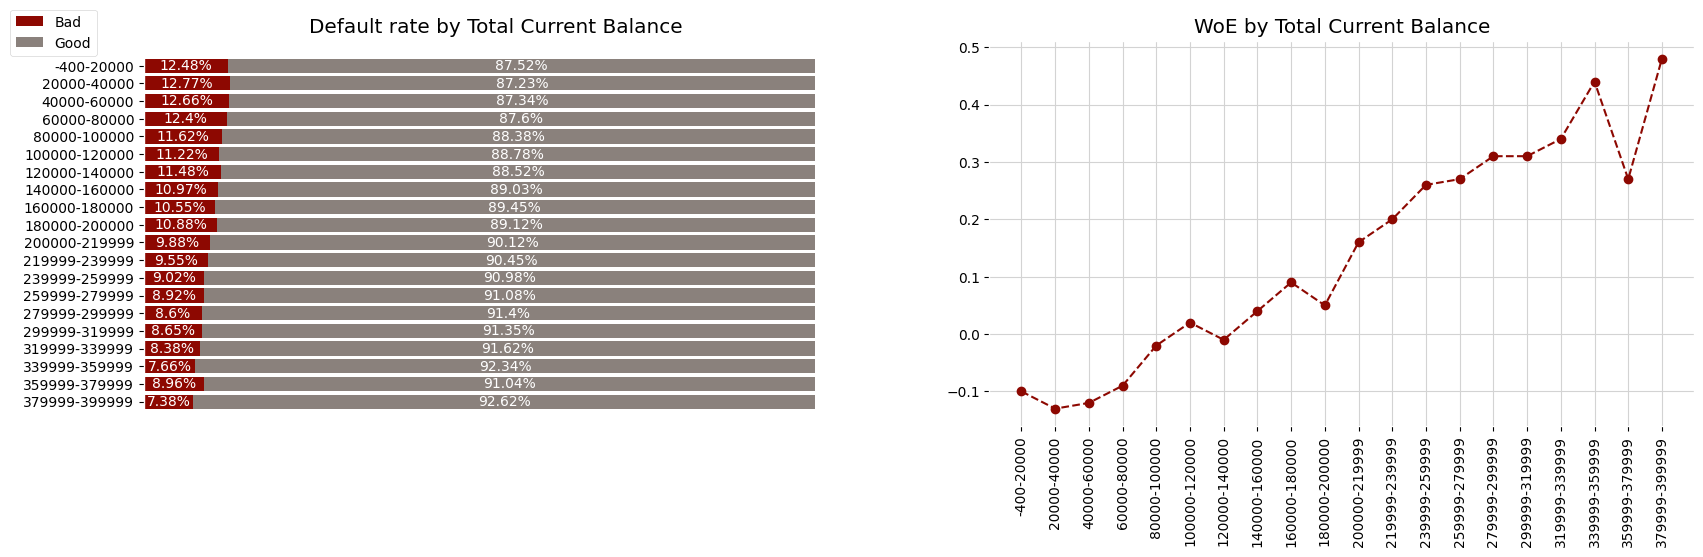

In [54]:
plot_woe_bad_rate_by_variable(tot_cur_bal_df, 'Total Current Balance', rotation=90)

Insights:
- Considering about 95% of the applicants have a total current balance lower than 400,000 dollars, I will create a separate dummy for current balances higher than this value and analyze WoE across categories below it.
- It is possible to see that, the higher the total current balance, the lower the credit risk. Specially in extremely high balances like 300,000 or more.
- 0 to 80,000 will be bundled together because of their similar WoE. Once they present the highest credit risk and lowest WoE, they will be our reference category for total current balance variable.
- 80,000 to 140,000 will be bundled together because of their similar WoE and few number of observations. The same is true for 140,000 to 200,000, 200,000 to 239,999, 239,999 to 279,000, 279,000 to 339,999 and 339,999 to 399,999.

#### 2.7.3.16 Months Since Last Delinquency

In [55]:
mths_since_last_delinq_less_75 = train.loc[train['mths_since_last_delinq'] < 75]
mths_since_last_delinq_df = default_analysis(pd.cut(mths_since_last_delinq_less_75['mths_since_last_delinq'], 20), 'mths_since_last_delinq', mths_since_last_delinq_less_75, continuous=True, not_ordered=False)
mths_since_last_delinq_df

n_obs  obs_proportion (%)  good_row (%)  bad_row (%)    n_good    n_bad  good_col (%)  bad_col (%)   g/b   woe   iv
mths_since_last_delinq_cat                                                                                                                      
0-4                           4984                3.13         85.15        14.85    4244.0    740.0          3.02         3.89  5.74 -0.25  0.0
4-7                          10491                6.58         87.68        12.32    9198.0   1293.0          6.55         6.80  7.11 -0.04  0.0
7-11                         12838                8.05         88.08        11.92   11308.0   1530.0          8.05         8.04  7.39   0.0  0.0
11-15                         9741                6.11         87.88        12.12    8560.0   1181.0          6.10         6.21  7.25 -0.02  0.0
15-18                        12514                7.85         88.16        11.84   11032.0   1482.0          7.86         7.79  7.44  0.01  0.0
18-22                        11052                6.93         88.17        11.83    9744.0   1308.0          6.94         6.87  7.45  0.01  0.0
22-26                         7774                4.88         88.55        11.45    6884.0    890.0          4.90         4.68  7.73  0.05  0.0
26-30                        10479                6.57         88.35        11.65    9258.0   1221.0          6.59         6.42  7.58  0.03  0.0
30-33                         9860                6.18         88.80        11.20    8756.0   1104.0          6.24         5.80  7.93  0.07  0.0
33-37                         9486                5.95         88.92        11.08    8435.0   1051.0          6.01         5.52  8.03  0.08  0.0
37-41                         7047                4.42         87.81        12.19    6188.0    859.0          4.41         4.51   7.2 -0.02  0.0
41-44                         9009                5.65         88.26        11.74    7951.0   1058.0          5.66         5.56  7.52  0.02  0.0
44-48                         8670                5.44         88.44        11.56    7668.0   1002.0          5.46         5.27  7.65  0.04  0.0
48-52                         4840                3.04         87.50        12.50    4235.0    605.0          3.02         3.18   7.0 -0.05  0.0
52-56                         5894                3.70         87.82        12.18    5176.0    718.0          3.69         3.77  7.21 -0.02  0.0
56-59                         5590                3.51         88.44        11.56    4944.0    646.0          3.52         3.40  7.65  0.04  0.0
59-63                         3996                2.51         88.16        11.84    3523.0    473.0          2.51         2.49  7.45  0.01  0.0
63-67                         5146                3.23         87.74        12.26    4515.0    631.0          3.22         3.32  7.16 -0.03  0.0
67-70                         5099                3.20         87.76        12.24    4475.0    624.0          3.19         3.28  7.17 -0.03  0.0
70-74                         4943                3.10         87.64        12.36    4332.0    611.0          3.08         3.21  7.09 -0.04  0.0
total                       159453              100.00         88.07        11.93  140426.0  19027.0        100.00       100.00     -     -  0.0

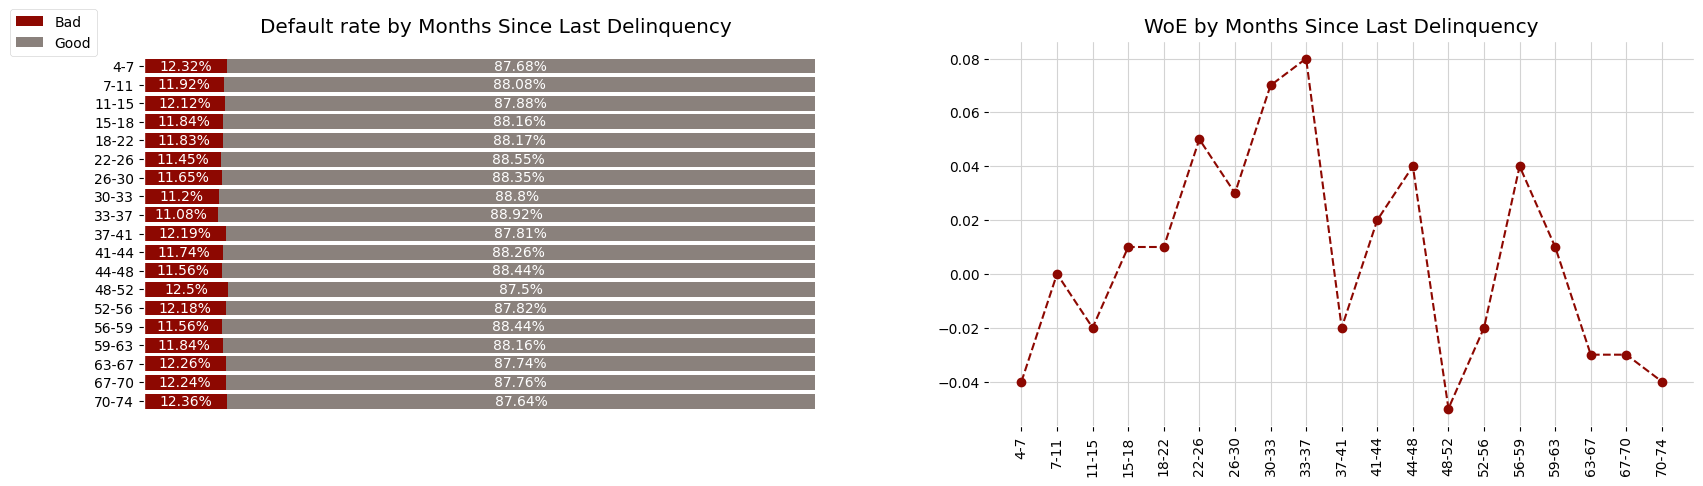

In [56]:
plot_woe_bad_rate_by_variable(mths_since_last_delinq_df.iloc[1:, :], 'Months Since Last Delinquency', rotation=90)

Insights:
- Considering about 95% of the applicants present less than 75 months since last delinquency, I will create a separate dummy for months since last delinquency higher than this value and analyze WoE across categories below it.
- 0-4 and 4-7 will have their own dummies because of their distinct WoE value and significant number of observations. Considering 0-4 has the highest credit risk, it will be our reference category for months since last delinquency variable.
- 7 to 22 will be bundled together because the variable shows a random pattern regarding WoE values (look at the fluctuations). Thus, larger groups of categories will be bundled. The same is true for 22 to 37, and 37-74. 

#### 2.7.3.17 Delinquencies in 2 Years

In [57]:
delinq_2yrs_df = default_analysis(train['delinq_2yrs'], 'delinq_2yrs', train, continuous=False, not_ordered=False)
delinq_2yrs_df.head(10)

n_obs  obs_proportion (%)  good_row (%)  bad_row (%)    n_good    n_bad  good_col (%)  bad_col (%)    g/b   woe   iv
delinq_2yrs_cat                                                                                                                       
0                308999               82.84         88.02        11.98  271982.0  37017.0         82.85        82.80   7.35   0.0  0.0
1                 43638               11.70         88.16        11.84   38472.0   5166.0         11.72        11.56   7.45  0.01  0.0
2                 12457                3.34         87.72        12.28   10927.0   1530.0          3.33         3.42   7.14 -0.03  0.0
3                  4246                1.14         87.28        12.72    3706.0    540.0          1.13         1.21   6.86 -0.07  0.0
4                  1723                0.46         87.81        12.19    1513.0    210.0          0.46         0.47    7.2 -0.02  0.0
5                   897                0.24         87.85        12.15     788.0    109.0          0.24         0.24   7.23 -0.02  0.0
6                   460                0.12         88.26        11.74     406.0     54.0          0.12         0.12   7.52  0.02  0.0
7                   243                0.07         86.83        13.17     211.0     32.0          0.06         0.07   6.59 -0.11  0.0
8                   131                0.04         88.55        11.45     116.0     15.0          0.04         0.03   7.73  0.05  0.0
9                    68                0.02         91.18         8.82      62.0      6.0          0.02         0.01  10.33  0.34  0.0

Insights:
- It is possible to observe that almost 100% of the applicants have a number of delinquencies in the range of 0 to 3 over two years. Specifically, 0 constitutes approximately 83% of the data, indicating a significant imbalance. Furthermore, there is practically no discriminatory power in this variable across its categories. Therefore, it will be removed further in the preprocessing step.

#### 2.7.3.18 Accounts now Delinquent

In [58]:
acc_now_delinq_df = default_analysis(train['acc_now_delinq'], 'acc_now_delinq', train, continuous=False, not_ordered=False)
acc_now_delinq_df

n_obs  obs_proportion (%)  good_row (%)  bad_row (%)    n_good    n_bad  good_col (%)  bad_col (%)    g/b   woe   iv
acc_now_delinq_cat                                                                                                                       
0                   371819               99.68         88.02        11.98  327257.0  44562.0         99.68        99.68   7.34  -0.0  0.0
1                     1118                0.30         87.92        12.08     983.0    135.0          0.30         0.30   7.28 -0.01  0.0
2                       55                0.01         92.73         7.27      51.0      4.0          0.02         0.01  12.75  0.55  0.0
3                        7                0.00         71.43        28.57       5.0      2.0          0.00         0.00    2.5 -1.08  0.0
4                        3                0.00        100.00         0.00       3.0      0.0          0.00         0.00    inf   inf  inf
5                        2                0.00         50.00        50.00       1.0      1.0          0.00         0.00    1.0 -1.99  0.0
total               373004              100.00         88.02        11.98  328300.0  44704.0        100.00       100.00      -     -  inf

Insights:
- It is possible to observe that almost 100% of the applicants have 0 accounts currently delinquent, showing an extreme imbalance in this variable. The very few remaining data points with one or more accounts delinquent shows practically no discriminatory power. Thus, this variable will be removed further in the preprocessing step.

#### 2.7.3.19 Inquiries in the Last 6 Months

In [59]:
inq_last_6mths_df = default_analysis(train['inq_last_6mths'], 'inq_last_6mths', train, continuous=False, not_ordered=False)
inq_last_6mths_df.head(10)

n_obs  obs_proportion (%)  good_row (%)  bad_row (%)    n_good    n_bad  good_col (%)  bad_col (%)   g/b   woe    iv
inq_last_6mths_cat                                                                                                                       
0                   186636               50.04         89.89        10.11  167762.0  18874.0         51.10        42.22  8.89  0.19  0.02
1                   104578               28.04         87.37        12.63   91368.0  13210.0         27.83        29.55  6.92 -0.06  0.00
2                    49098               13.16         85.52        14.48   41987.0   7111.0         12.79        15.91   5.9 -0.22  0.01
3                    22257                5.97         83.57        16.43   18600.0   3657.0          5.67         8.18  5.09 -0.37  0.01
4                     6398                1.72         84.39        15.61    5399.0    999.0          1.64         2.23   5.4 -0.31  0.00
5                     2468                0.66         82.09        17.91    2026.0    442.0          0.62         0.99  4.58 -0.47  0.00
6                     1107                0.30         77.60        22.40     859.0    248.0          0.26         0.55  3.46 -0.75  0.00
7                      195                0.05         65.13        34.87     127.0     68.0          0.04         0.15  1.87 -1.37  0.00
8                      122                0.03         62.30        37.70      76.0     46.0          0.02         0.10  1.65 -1.49  0.00
9                       50                0.01         64.00        36.00      32.0     18.0          0.01         0.04  1.78 -1.42  0.00

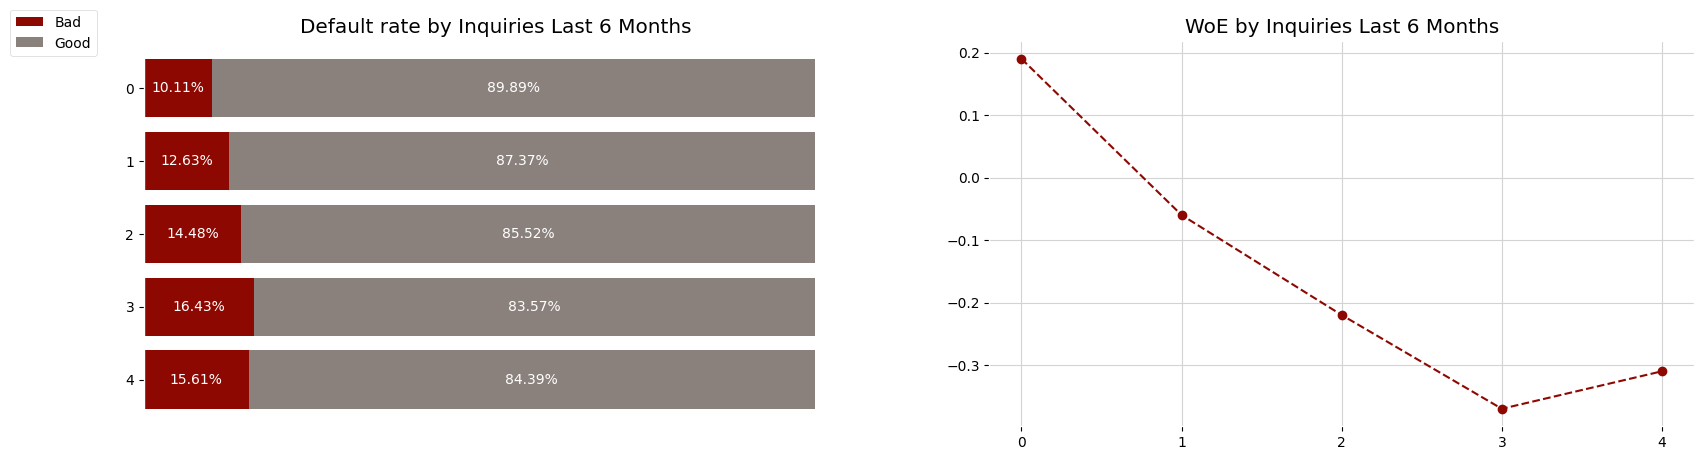

In [60]:
plot_woe_bad_rate_by_variable(inq_last_6mths_df.iloc[:6, :], 'Inquiries Last 6 Months')

Insights:
- 0, 1, 2 and 3 inquiries in the last 6 months will have their own dummies because of their distinc WoE and significant number of observations.
- 4 inquiries or more will be grouped together because they present extremely low proportions of observations, close to zero or even zero. Since this combined group represents the highest credit risk with the lowest WoE, it will serve as our reference category for the inquiries in the last 6 months variable.

#### 2.7.3.20 Public Records

In [61]:
pub_rec_df = default_analysis(train['pub_rec'], 'pub_rec', train, continuous=False, not_ordered=False)
#pub_rec_df

Insights:
- Since over 98% of the applicants have either 0 or 1 public records, with 0 constituting approximately 88% of the data, and considering the very close Weight of Evidence (WoE) values for these categories, I have decided to remove this variable in the preprocessing step. It demonstrates practically no discriminatory power in distinguishing between good and bad borrowers.

#### 2.7.3.21 Open Accounts

In [62]:
open_acc_less_31 = train.loc[train['open_acc'] < 31]
open_acc_df = default_analysis(pd.cut(open_acc_less_31['open_acc'], 10), 'open_acc', open_acc_less_31, continuous=True, not_ordered=False)
open_acc_df

n_obs  obs_proportion (%)  good_row (%)  bad_row (%)    n_good    n_bad  good_col (%)  bad_col (%)   g/b   woe   iv
open_acc_cat                                                                                                                      
0-3             6311                1.70         84.99        15.01    5364.0    947.0          1.64         2.13  5.66 -0.26  0.0
3-6            53018               14.26         88.13        11.87   46726.0   6292.0         14.28        14.12  7.43  0.01  0.0
6-9           100814               27.11         88.04        11.96   88755.0  12059.0         27.12        27.06  7.36   0.0  0.0
9-12           93772               25.22         87.84        12.16   82369.0  11403.0         25.17        25.59  7.22 -0.02  0.0
12-15          59204               15.92         88.21        11.79   52224.0   6980.0         15.96        15.66  7.48  0.02  0.0
15-18          31933                8.59         88.28        11.72   28192.0   3741.0          8.61         8.39  7.54  0.03  0.0
18-21          15512                4.17         88.26        11.74   13691.0   1821.0          4.18         4.09  7.52  0.02  0.0
21-24           7149                1.92         88.59        11.41    6333.0    816.0          1.93         1.83  7.76  0.06  0.0
24-27           2952                0.79         87.47        12.53    2582.0    370.0          0.79         0.83  6.98 -0.05  0.0
27-30           1209                0.33         88.83        11.17    1074.0    135.0          0.33         0.30  7.96  0.08  0.0
total         371874              100.00         88.02        11.98  327310.0  44564.0        100.00       100.00     -     -  0.0

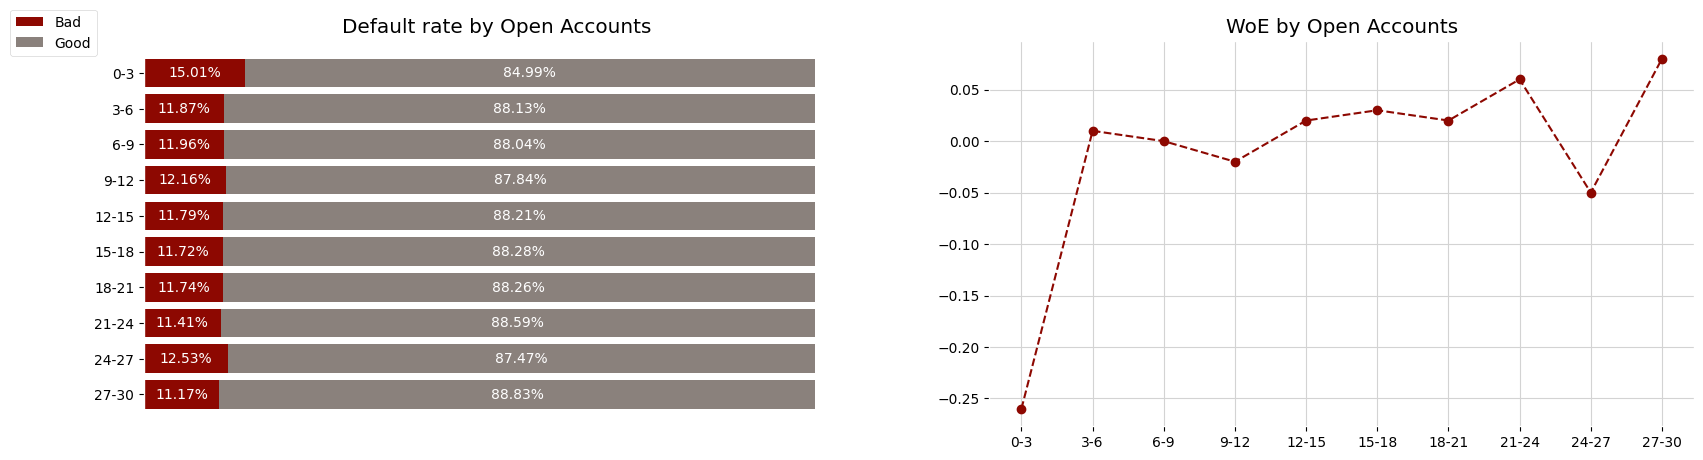

In [63]:
plot_woe_bad_rate_by_variable(open_acc_df, 'Open Accounts')

Insights:
- Considering almost 97% of the applicants have from 0 to 30 open accounts, I will create a separate dummy for more than 30 open accounts. 
- 0-3 will be bundled with 3-6 because of its low proportion of observations. Moreover, these will compose our reference category for open accounts variable, because they present the highest credit risk and lowest WoE.
- 6 to 12 will be bundled together because of their similar WoE. The same is true for 12 to 21 and 21 to 30 open accounts.

#### 2.7.3.22 Total Accounts

In [64]:
total_acc_less_49 = train.loc[train['total_acc'] < 49]
total_acc_df = default_analysis(pd.cut(total_acc_less_49['total_acc'], 20), 'total_acc', total_acc_less_49, continuous=True, not_ordered=False)
total_acc_df

n_obs  obs_proportion (%)  good_row (%)  bad_row (%)    n_good    n_bad  good_col (%)  bad_col (%)   g/b   woe   iv
total_acc_cat                                                                                                                      
1-3               553                0.15         79.75        20.25     441.0    112.0          0.14         0.26  3.94 -0.62  0.0
3-6              3150                0.88         84.29        15.71    2655.0    495.0          0.84         1.15  5.36 -0.31  0.0
6-8             12044                3.35         85.80        14.20   10334.0   1710.0          3.27         3.96  6.04 -0.19  0.0
8-10            13756                3.83         86.52        13.48   11902.0   1854.0          3.77         4.29  6.42 -0.13  0.0
10-13           18025                5.02         86.92        13.08   15667.0   2358.0          4.96         5.46  6.64  -0.1  0.0
13-15           34102                9.50         87.13        12.87   29714.0   4388.0          9.40        10.16  6.77 -0.08  0.0
15-17           25933                7.22         87.49        12.51   22688.0   3245.0          7.18         7.51  6.99 -0.04  0.0
17-20           26826                7.47         87.83        12.17   23560.0   3266.0          7.46         7.56  7.21 -0.01  0.0
20-22           41521               11.56         88.07        11.93   36566.0   4955.0         11.57        11.47  7.38  0.01  0.0
22-24           26666                7.42         88.05        11.95   23480.0   3186.0          7.43         7.37  7.37  0.01  0.0
24-27           24817                6.91         88.59        11.41   21985.0   2832.0          6.96         6.55  7.76  0.06  0.0
27-29           33049                9.20         88.66        11.34   29302.0   3747.0          9.27         8.67  7.82  0.07  0.0
29-32           19149                5.33         88.62        11.38   16969.0   2180.0          5.37         5.05  7.78  0.06  0.0
32-34           16634                4.63         88.61        11.39   14740.0   1894.0          4.67         4.38  7.78  0.06  0.0
34-36           20380                5.67         88.86        11.14   18110.0   2270.0          5.73         5.25  7.98  0.09  0.0
36-39           10802                3.01         89.47        10.53    9665.0   1137.0          3.06         2.63   8.5  0.15  0.0
39-41            9135                2.54         88.92        11.08    8123.0   1012.0          2.57         2.34  8.03  0.09  0.0
41-43           10827                3.01         88.73        11.27    9607.0   1220.0          3.04         2.82  7.87  0.07  0.0
43-46            5521                1.54         88.79        11.21    4902.0    619.0          1.55         1.43  7.92  0.08  0.0
46-48            6265                1.74         88.44        11.56    5541.0    724.0          1.75         1.68  7.65  0.05  0.0
total          359155              100.00         87.97        12.03  315951.0  43204.0        100.00       100.00     -     -  0.0

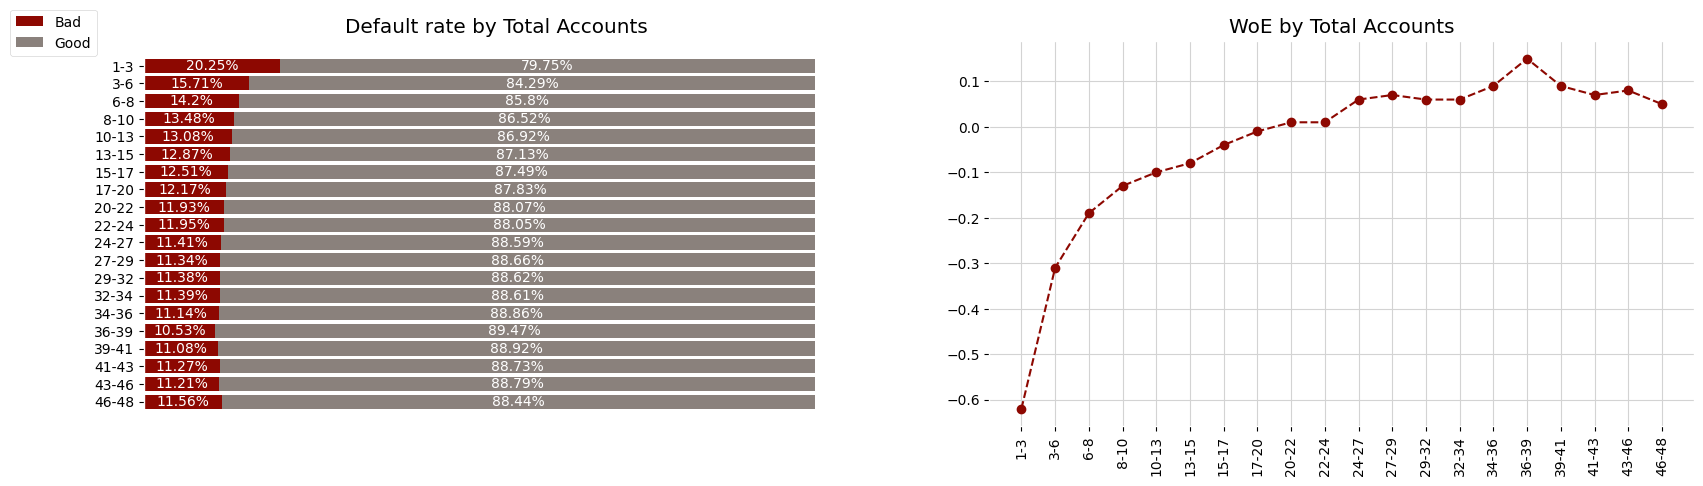

In [65]:
plot_woe_bad_rate_by_variable(total_acc_df, 'Total Accounts', rotation=90)

Insights:
- Considering almost 97% of the applicants have less than 48 total accounts, I will create a separate dummy for observations higher than this value and analyze WoE across the categories below it.
- 1-3, 3-6 and 6-8 will be bundled together because of their low proportions of observations. Moreover, once they present the highest credit risk and lowest WoE, they will compose our reference category for total accounts variable.
- 8 to 15 will be bundled together because of their similar WoE. The same is true for 15 to 24, 24 to 36 and 36 to 48.

#### 2.8 Conclusion

In this notebook, valuable **insights** were gained regarding Lending Club's lending operations and **credit risk** management. Key **preprocessing decisions** were made based on the discriminatory power of various features in distinguishing between good and bad borrowers. This included creating **dummy variables** for relevant features and **binning continuous variables** for more effective analysis.

### Key Insights about Lending Club's Lending Portfolio

- **Personal Indicators:**
  - Approximately 12% of borrowers are defaulters, highlighting the need for precise risk assessment.
  - Nearly three out of four loans have a 36-month term.
  - Over 75% of borrowers have at least 2 years of professional experience, with more than 30% having 10 or more years.
  - Over 90% either own a home through a mortgage or pay rent, while only about 8.5% own their homes outright.
  - Nearly 90% of borrowers have credit grades between A and D, while grades F and G represent less than 4%.
  - The primary reasons for taking loans are **debt consolidation** and **credit card payments**, accounting for approximately 80% of the total loan purposes.
  - Over 15% of borrowers live in California, indicating a regional concentration.

  These indicators suggest a conservative applicant profile characterized by financial and professional stability.

- **Financial Indicators:**
  - The maximum loan amount is $35,000, with 50% falling between $8,000 and $20,000. The average loan amount is approximately $14,000.
  - Half of the interest rates range between 11% and 16.8%, with a maximum charge of 26% and a minimum of 5.42%.
  - The average annual income is $72,970, though highly skewed due to extreme high-income outliers.
  - Half of the applicants have a debt-to-income ratio up to 16.6%.
  - Credit limits typically range from $13,500 to $37,300, but, similar to income, this value can vary significantly due to high-value outliers.

  These indicators reflect a **moderately conservative investment portfolio** with reasonable loan amounts and interest rates.

- **Credit Risk Indicators:**
  - A **monotonic decrease** in default rate is observed as borrowers' grades improve from G to A. Borrowers with grade G have a **bad rate** 6.4 times higher than those with grade A.
  - Higher interest rates are associated with higher default risks. Loans with interest rates above 20% have a **bad rate** approximately 8 times higher than those with rates between 5% and 7%.
  - Lower annual incomes correlate with higher credit risk. For example, borrowers earning $1,748 to $24,111 annually have a **bad rate** nearly **twice as high** as those earning $120,000 or more.
  - The same trend applies to the **debt-to-income ratio**, where a higher ratio indicates increased default risk.

Additionally, an **increasing trend** in loan applications has been observed over time.

### Takeaways for Northwest Bank

Given these insights, Northwest Bank can apply the following strategies:

- **Risk Assessment and Credit Policy:**
  - Develop stricter credit policies for borrowers with lower grades (F and G), higher interest rates, and lower annual incomes.
  - Use advanced scoring models to improve the prediction of default risks based on key indicators like income, grade, and debt-to-income ratio.

- **Loan Portfolio Management:**
  - Diversify the loan portfolio by considering regional distributions and industry-specific risks.
  - Offer more personalized loan products with flexible terms and adjusted interest rates based on borrower profiles.

- **Operational Improvements:**
  - Establish a monitoring system to detect changes in borrower characteristics over time.
  - Conduct regular reviews of underwriting criteria and adjust thresholds based on predictive insights.

By leveraging these strategies, Northwest Bank can improve its **credit risk management**, **optimize returns**, and **ensure sustainable growth** in its lending operations.